# SOCIETY OF PETROLEUM ENGINEERS(SPE) DATA SCIENCE ENGINEERING AND ANALYTICS TECHNICAL SECTION(DSEATS) AFRICA REGION COMPETITION FOR STUDENTS AND YOUNG PROFESSIONALS



# Predicting Oil, Gas, and Water Production Rates Using Machine Learning

In this notebook, I will embark on a comprehensive machine learning workflow aimed at predicting oil, gas, and water production rates based on historical data.

## 1. Problem Definition

> How accurately can I forecast future oil, gas, and water production rates given various characteristics and historical data of previous production rates?

## 2. Data Overview

The provided production data pertains to a conceptual oil field named DSEATS, encompassing historical production records.

### Datasets Provided:
1. **Training Dataset**: Historical production data from 2008 to 2014.
2. **Validation Dataset**: Historical production data from 2015 to 2016.

Using the features in the training dataset, I will develop a machine learning model to predict the oil, gas, and water production rates in the validation dataset.

### Dataset Details:
- **dseats_2024_training_dataset.csv**: Contains historical production data from 2008 to 2014, with approximately 7000 records and over 10 attributes, including the target variables: Oil Production (stb/day), Gas Volume (scf/day), and Water Production (stb/day).
- **dseats_2024_validation_dataset.csv**: Contains historical production data from 2015 to 2016, with over 2000 records and the same attributes as the training dataset, excluding the target variables which I aim to predict.

## 3. Evaluation Metrics

The performance of the predictive model will be assessed using key performance indicators such as:
- **Root Mean Squared Error (RMSE)**
- **R-squared (R²)**
- **Mean Absolute Error (MAE)**

Additionally, I will estimate the total production of oil, gas, and water over the historical and forecast periods.

## 4. Feature Description

The features in the dataset include:

| Feature                     | Description                                                                                       |
|-----------------------------|---------------------------------------------------------------------------------------------------|
| **PRODUCTION DATE**         | The date on which production data was recorded.                                                   |
| **Field Name**              | Identifies the specific oil field, in this case, DSEATS.                                          |
| **WELL_BORE_CODE**          | A unique identifier for each well, reflecting unique production characteristics.                  |
| **N_WELL_BORE_CODE**        | Another identifier for wells, similar to WELL_BORE_CODE.                                          |
| **WellBore Name**           | The name assigned to a wellbore, aiding in tracking and analysis.                                 |
| **FLOW_KIND**               | Indicates the type of flow (e.g., continuous, intermittent), which can reflect different production strategies. |
| **WELL_TYPE**               | Specifies the type of well.                                                                       |
| **Downhole Pressure (PSI)** | Pressure measured at the bottom of the well, which can support higher production rates but may decrease over time. |
| **Downhole Temperature (Kelvin)** | Temperature at the bottom of the well, affecting fluid properties and equipment performance. |
| **Average Tubing Pressure** | Pressure in the tubing through which fluids are produced, managed to optimize production rates.    |
| **Annulus Pressure (PSI)**  | Pressure in the annular space between the tubing and casing, important for monitoring well integrity. |
| **AVG WHP (PSI)**           | Average wellhead pressure, influencing the production rate by providing the necessary pressure differential to lift fluids to the surface. |
| **Choke Size**              | The size of the choke, controlling the flow rate of fluids from the well.                         |
| **Oil Production (stb/day)**| The amount of oil produced per day.                                                               |
| **Gas Volume (scf/day)**    | The volume of gas produced per day.                                                               |
| **Water Production (stb/day)**| The volume of water produced per day.                                                           |

**Note:** All units are in field units.

With this foundational understanding, let's proceed to import the datasets and begin our exploratory data analysis. My initial objective will be to establish a baseline model, followed by iterative improvements.

🚀 Let's get started!

## DATA LOADING



In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

Load the datasets provided i.e training and validation datasets

In [2]:
train_data = pd.read_csv('dseats_2024_training_dataset.csv')
train_data

,PRODUCTION DATE,Field Name,WELL_BORE_CODE,N_WELL_BORE_CODE,WellBore Name,FLOW_KIND,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
0,07/04/2014 00:00,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.0000
1,08/04/2014 00:00,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.0000
2,09/04/2014 00:00,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.0000
3,10/04/2014 00:00,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.0000
4,11/04/2014 00:00,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,4500.454030,370.025890,4020.534770,0.000000,479.919260,33.071950,0.0000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6920,26/06/2015 00:00,DSEAT,DSEAT-001-F-15 D,109,001-F-15 D,production,OP,2903.229117,379.373252,2460.629972,182.554483,442.599145,1.880480,747.8181,614123.984,64.2838
6921,27/06/2015 00:00,DSEAT,DSEAT-001-F-15 D,109,001-F-15 D,production,OP,2905.030564,379.379814,2456.159205,184.106427,448.871358,2.120109,749.2019,614168.462,64.4725
6922,28/06/2015 00:00,DSEAT,DSEAT-001-F-15 D,109,001-F-15 D,production,OP,2928.389988,379.313739,2484.425946,175.609150,443.964042,1.980460,789.9611,648175.070,65.9192
6923,29/06/2015 00:00,DSEAT,DSEAT-001-F-15 D,109,001-F-15 D,production,OP,2939.874982,379.288114,2496.000496,173.255362,443.874486,1.692930,789.7724,637067.219,63.3403


In [3]:
validation_data = pd.read_csv('dseats_2024_validation_dataset.csv')
validation_data

,PRODUCTION DATE,Field Name,WELL_BORE_CODE,N_WELL_BORE_CODE,WellBore Name,FLOW_KIND,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
0,2015-07-01 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3061.253047,380.665745,2659.809580,0.0,401.443468,0.491632,NaN,NaN,NaN
1,2015-07-02 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3247.951135,376.759980,2547.453670,0.0,700.497465,21.775180,NaN,NaN,NaN
2,2015-07-03 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3333.012485,375.985300,2533.912265,0.0,799.100220,27.638780,NaN,NaN,NaN
3,2015-07-04 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3404.022465,375.419010,2481.804485,0.0,922.217980,36.178940,NaN,NaN,NaN
4,2015-07-05 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3465.473030,375.004710,2408.310945,0.0,1057.162085,45.424140,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Upon inspection of the data, I discovered that it is time series data and I want to enrich the time & date component as much as possible

I will do that by telling pandas which of our colums has dates in it using the `parse_dates` parameter.

In [5]:
train_data = pd.read_csv('dseats_2024_training_dataset.csv', parse_dates=['PRODUCTION DATE'])

validation_data = pd.read_csv('dseats_2024_validation_dataset.csv', parse_dates=['PRODUCTION DATE'])

display(train_data)
display(validation_data)

,PRODUCTION DATE,Field Name,WELL_BORE_CODE,N_WELL_BORE_CODE,WellBore Name,FLOW_KIND,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
0,2014-07-04,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.0000
1,2014-08-04,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.0000
2,2014-09-04,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.0000
3,2014-10-04,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.0000
4,2014-11-04,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,4500.454030,370.025890,4020.534770,0.000000,479.919260,33.071950,0.0000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6920,2015-06-26,DSEAT,DSEAT-001-F-15 D,109,001-F-15 D,production,OP,2903.229117,379.373252,2460.629972,182.554483,442.599145,1.880480,747.8181,614123.984,64.2838
6921,2015-06-27,DSEAT,DSEAT-001-F-15 D,109,001-F-15 D,production,OP,2905.030564,379.379814,2456.159205,184.106427,448.871358,2.120109,749.2019,614168.462,64.4725
6922,2015-06-28,DSEAT,DSEAT-001-F-15 D,109,001-F-15 D,production,OP,2928.389988,379.313739,2484.425946,175.609150,443.964042,1.980460,789.9611,648175.070,65.9192
6923,2015-06-29,DSEAT,DSEAT-001-F-15 D,109,001-F-15 D,production,OP,2939.874982,379.288114,2496.000496,173.255362,443.874486,1.692930,789.7724,637067.219,63.3403


,PRODUCTION DATE,Field Name,WELL_BORE_CODE,N_WELL_BORE_CODE,WellBore Name,FLOW_KIND,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
0,2015-07-01,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3061.253047,380.665745,2659.809580,0.0,401.443468,0.491632,NaN,NaN,NaN
1,2015-07-02,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3247.951135,376.759980,2547.453670,0.0,700.497465,21.775180,NaN,NaN,NaN
2,2015-07-03,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3333.012485,375.985300,2533.912265,0.0,799.100220,27.638780,NaN,NaN,NaN
3,2015-07-04,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3404.022465,375.419010,2481.804485,0.0,922.217980,36.178940,NaN,NaN,NaN
4,2015-07-05,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3465.473030,375.004710,2408.310945,0.0,1057.162085,45.424140,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9915,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9916,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9917,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9918,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
train_data['PRODUCTION DATE'].dtype

dtype('<M8[ns]')

Our `PRODUCTION DATE` is currently an object. I will change it to a datetime object

In [7]:
import pandas as pd

# Convert 'PRODUCTION DATE' to datetime with dayfirst=True
train_data['PRODUCTION DATE'] = pd.to_datetime(train_data['PRODUCTION DATE'], dayfirst=True)

validation_data['PRODUCTION DATE'] = pd.to_datetime(validation_data['PRODUCTION DATE'], dayfirst=True)

# Sort the dataframes by 'PRODUCTION DATE' in ascending order
train_data = train_data.sort_values(by='PRODUCTION DATE', ascending=True)
validation_data = validation_data.sort_values(by='PRODUCTION DATE', ascending=True)

display(train_data)
display(validation_data)

,PRODUCTION DATE,Field Name,WELL_BORE_CODE,N_WELL_BORE_CODE,WellBore Name,FLOW_KIND,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
1188,2008-01-03,DSEAT,DSEAT-001-F-12 H,107,001-F-12,production,OP,4159.928094,379.059089,2581.939053,161.755131,1577.989041,75.573165,19300.7392,1.579972e+07,2.8934
3799,2008-01-03,DSEAT,DSEAT-001-F-14 H,108,001-F-14,production,OP,0.000000,273.150000,0.000000,0.010005,0.000000,7.275100,0.0000,0.000000e+00,0.0000
1219,2008-01-04,DSEAT,DSEAT-001-F-12 H,107,001-F-12,production,OP,3920.214475,379.039148,2507.459404,166.307097,1412.755070,66.386227,19251.1740,1.616165e+07,17.7378
3830,2008-01-04,DSEAT,DSEAT-001-F-14 H,108,001-F-14,production,OP,0.000000,273.150000,0.000000,0.000000,0.000000,30.421270,0.0000,0.000000e+00,0.0000
3859,2008-01-05,DSEAT,DSEAT-001-F-14 H,108,001-F-14,production,OP,0.000000,273.150000,0.000000,0.000000,0.000000,18.244340,0.0000,0.000000e+00,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,2015-12-06,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,3769.841687,381.094950,3284.975236,0.000000,484.866452,5.694804,1338.8265,1.096232e+06,8097.5573
6906,2015-12-06,DSEAT,DSEAT-001-F-15 D,109,001-F-15 D,production,OP,2900.965011,379.422346,2452.984213,193.032377,447.980799,2.266941,772.0975,6.321888e+05,57.2390
6373,2015-12-06,DSEAT,DSEAT-001-F-14 H,108,001-F-14,production,OP,3853.658055,372.643576,3413.720234,211.582589,439.937821,1.815075,1295.2997,1.060602e+06,19980.6882
3762,2015-12-06,DSEAT,DSEAT-001-F-12 H,107,001-F-12,production,OP,0.000000,273.150000,430.390024,392.767886,430.390024,0.958451,4415.7687,3.615688e+06,7093.7991


,PRODUCTION DATE,Field Name,WELL_BORE_CODE,N_WELL_BORE_CODE,WellBore Name,FLOW_KIND,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
0,2015-07-01,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3061.253047,380.665745,2659.809580,0.000000,401.443468,0.491632,NaN,NaN,NaN
1631,2015-07-01,DSEAT,DSEAT-001-F-15 D,109.0,001-F-15 D,production,OP,2927.412585,379.350837,2477.725300,179.458157,449.687286,2.403162,NaN,NaN,NaN
1186,2015-07-01,DSEAT,DSEAT-001-F-14 H,108.0,001-F-14,production,OP,3876.514897,372.701988,3433.135224,217.380248,443.379674,2.033551,NaN,NaN,NaN
296,2015-07-01,DSEAT,DSEAT-001-F-11 H,106.0,001-F-11,production,OP,3216.818149,379.118577,2550.442350,253.278415,666.375799,17.355769,NaN,NaN,NaN
741,2015-07-01,DSEAT,DSEAT-001-F-12 H,107.0,001-F-12,production,OP,0.000000,273.150000,436.237771,299.785775,436.237771,1.178882,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9915,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9916,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9917,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9918,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Find the date range of the 'PRODUCTION DATE' column in train_data
train_date_range = train_data['PRODUCTION DATE'].min(), train_data['PRODUCTION DATE'].max()
train_date_range

(Timestamp('2008-01-03 00:00:00'), Timestamp('2015-12-06 00:00:00'))

The training dataset spans from February 12, 2008, to June 30, 2008, covering a period of over six years.

## • MAKING A COPY OF THE ORIGINAL DATA

I'm making a copy of the data so that when I manipulate the copy, I still have the original dataset



In [9]:
df_temp = train_data.copy()
df_temp.head()

,PRODUCTION DATE,Field Name,WELL_BORE_CODE,N_WELL_BORE_CODE,WellBore Name,FLOW_KIND,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
1188,2008-01-03,DSEAT,DSEAT-001-F-12 H,107,001-F-12,production,OP,4159.928094,379.059089,2581.939053,161.755131,1577.989041,75.573165,19300.7392,15799719.44,2.8934
3799,2008-01-03,DSEAT,DSEAT-001-F-14 H,108,001-F-14,production,OP,0.000000,273.150000,0.000000,0.010005,0.000000,7.275100,0.0000,0.00,0.0000
1219,2008-01-04,DSEAT,DSEAT-001-F-12 H,107,001-F-12,production,OP,3920.214475,379.039148,2507.459404,166.307097,1412.755070,66.386227,19251.1740,16161652.45,17.7378
3830,2008-01-04,DSEAT,DSEAT-001-F-14 H,108,001-F-14,production,OP,0.000000,273.150000,0.000000,0.000000,0.000000,30.421270,0.0000,0.00,0.0000
3859,2008-01-05,DSEAT,DSEAT-001-F-14 H,108,001-F-14,production,OP,0.000000,273.150000,0.000000,0.000000,0.000000,18.244340,0.0000,0.00,0.0000


In [10]:
df_temp.head().T

,1188,3799,1219,3830,3859
PRODUCTION DATE,2008-01-03 00:00:00,2008-01-03 00:00:00,2008-01-04 00:00:00,2008-01-04 00:00:00,2008-01-05 00:00:00
Field Name,DSEAT,DSEAT,DSEAT,DSEAT,DSEAT
WELL_BORE_CODE,DSEAT-001-F-12 H,DSEAT-001-F-14 H,DSEAT-001-F-12 H,DSEAT-001-F-14 H,DSEAT-001-F-14 H
N_WELL_BORE_CODE,107,108,107,108,108
WellBore Name,001-F-12,001-F-14,001-F-12,001-F-14,001-F-14
FLOW_KIND,production,production,production,production,production
WELL_TYPE,OP,OP,OP,OP,OP
Downhole Pressure (PSI),4159.928094,0.0,3920.214475,0.0,0.0
Downhole Temperature (Kelvin),379.059089,273.15,379.039148,273.15,273.15
Average Tubing Pressure,2581.939053,0.0,2507.459404,0.0,0.0


## 2. UNDERSTANDING THE DATA

Now that the data has been properly formatted, I will proceed with an in-depth understanding of the data.

In [11]:
# Get the shape of the train_data dataframe
df_temp.shape

(6925, 16)

The training dataset has 16 columns and 6,925 rows

Our data includes 4 types: datetime, float64, int64, and object.

### 1. Determine the Number of Unique Entries in Object-Type Columns

To gain a better understanding of the categorical data in our dataset, we will identify the number of unique entries in each column of type `object`.

In [12]:
# Determine the number of unique entries in object-type columns
object_columns = df_temp.select_dtypes(include=['object']).columns
unique_entries = {col: df_temp[col].nunique() for col in object_columns}
unique_entries

{'Field Name': 1,
 'WELL_BORE_CODE': 5,
 'WellBore Name': 5,
 'FLOW_KIND': 1,
 'WELL_TYPE': 2}

The dataset contains the following categorical information:
- 1 unique field name, which is "DSEAT"
- 1 unique flow kind, which is "production"
- 2 unique well types
- 5 unique WellBore names
- 5 corresponding WellBore codes

Let's have a closer look at the well types, wellbore names and wellbore codes

In [13]:
display(df_temp['WELL_TYPE'].value_counts())
display(df_temp['WellBore Name'].value_counts())
display(df_temp['WELL_BORE_CODE'].value_counts())

OP    6924
WI       1
Name: WELL_TYPE, dtype: int64

001-F-12      2611
001-F-14      2611
001-F-11       720
001-F-15 D     533
001-F-1 C      450
Name: WellBore Name, dtype: int64

DSEAT-001-F-12 H    2611
DSEAT-001-F-14 H    2611
DSEAT-001-F-11 H     720
DSEAT-001-F-15 D     533
DSEAT-001-F-1 C      450
Name: WELL_BORE_CODE, dtype: int64

In [14]:
df_temp.columns

Index(['PRODUCTION DATE', 'Field Name', 'WELL_BORE_CODE', 'N_WELL_BORE_CODE',
       'WellBore Name', 'FLOW_KIND', 'WELL_TYPE', 'Downhole Pressure (PSI)',
       'Downhole Temperature (Kelvin)', 'Average Tubing Pressure',
       'Annulus Pressure (PSI)', 'AVG WHP (PSI)', 'Choke Size',
       'Oil Production (stb/day)', 'Gas Volume (scf/day)',
       'Water Production (stb/day)'],
      dtype='object')

`N_WELL_BORE_CODE` is most likely an identifier related to `WellBore Name` and `WELL_BORE_CODE`. I'll inspect it's values

In [15]:
display(df_temp['N_WELL_BORE_CODE'].value_counts())

107    2611
108    2611
106     720
109     533
105     450
Name: N_WELL_BORE_CODE, dtype: int64

In [16]:
display(df_temp['PRODUCTION DATE'].dt.year.value_counts())

2014    1710
2015     905
2013     886
2009     724
2010     716
2011     672
2012     668
2008     644
Name: PRODUCTION DATE, dtype: int64

2014 is the year with the most data points, and 2008 is the year with the least, in our given dataset.

## 3. DATA CLEANING

#### Check for missing or null values

In [17]:
df_temp.isna().sum()

PRODUCTION DATE                  0
Field Name                       0
WELL_BORE_CODE                   0
N_WELL_BORE_CODE                 0
WellBore Name                    0
FLOW_KIND                        0
WELL_TYPE                        0
Downhole Pressure (PSI)          0
Downhole Temperature (Kelvin)    0
Average Tubing Pressure          0
Annulus Pressure (PSI)           0
AVG WHP (PSI)                    0
Choke Size                       6
Oil Production (stb/day)         0
Gas Volume (scf/day)             0
Water Production (stb/day)       0
dtype: int64

It appears that only the "Choke Size" column contains missing values. Since there are only 6 missing entries, I will proceed to drop these rows from the dataset.

In [18]:
# Drop rows from df_temp where the 'Choke Size' column contains NaN values
df_temp = df_temp.dropna(subset=['Choke Size'])

In [19]:
# Display the shape (number of rows and columns) of the dataframe df_temp
df_temp.shape

(6919, 16)

I'm going to take a further look and inspect the data more

In [20]:
# Check for any value in any of the columns that is equal to 0 in train_data
zero_values_train = (df_temp == 0).any(axis=1)
train_data_zero_values = df_temp[zero_values_train]

train_data_zero_values

,PRODUCTION DATE,Field Name,WELL_BORE_CODE,N_WELL_BORE_CODE,WellBore Name,FLOW_KIND,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
3799,2008-01-03,DSEAT,DSEAT-001-F-14 H,108,001-F-14,production,OP,0.000000,273.15000,0.000000,0.010005,0.000000,7.275100,0.0000,0.000,0.0000
3830,2008-01-04,DSEAT,DSEAT-001-F-14 H,108,001-F-14,production,OP,0.000000,273.15000,0.000000,0.000000,0.000000,30.421270,0.0000,0.000,0.0000
3859,2008-01-05,DSEAT,DSEAT-001-F-14 H,108,001-F-14,production,OP,0.000000,273.15000,0.000000,0.000000,0.000000,18.244340,0.0000,0.000,0.0000
3890,2008-01-06,DSEAT,DSEAT-001-F-14 H,108,001-F-14,production,OP,0.000000,273.15000,0.000000,0.000000,0.000000,4.038850,0.0000,0.000,0.0000
3920,2008-01-07,DSEAT,DSEAT-001-F-14 H,108,001-F-14,production,OP,3772.888110,367.24506,3722.460445,14.244510,50.427665,6.890100,0.0000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,2015-12-04,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,3944.141520,374.18259,2439.394015,0.000000,1504.747505,74.803550,0.0000,0.000,0.0000
400,2015-12-05,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,3893.237385,374.41755,2378.215035,0.000000,1515.022350,97.055380,0.0000,0.000,0.0000
3731,2015-12-05,DSEAT,DSEAT-001-F-12 H,107,001-F-12,production,OP,0.000000,273.15000,676.362611,381.018491,676.362611,17.942122,3437.3592,2806391.301,5063.1984
431,2015-12-06,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,3769.841687,381.09495,3284.975236,0.000000,484.866452,5.694804,1338.8265,1096232.322,8097.5573


In [21]:
(df_temp == 0).sum()

PRODUCTION DATE                     0
Field Name                          0
WELL_BORE_CODE                      0
N_WELL_BORE_CODE                    0
WellBore Name                       0
FLOW_KIND                           0
WELL_TYPE                           0
Downhole Pressure (PSI)          1833
Downhole Temperature (Kelvin)       0
Average Tubing Pressure           167
Annulus Pressure (PSI)           2081
AVG WHP (PSI)                     165
Choke Size                         22
Oil Production (stb/day)          681
Gas Volume (scf/day)              678
Water Production (stb/day)       1050
dtype: int64

In the dataset, while there are no null or missing values, I observe a significant number of zero entries in the numerical columns. Notably, the `Annulus Pressure (PSI)` column contains 2,081 zero values. Dropping these data points is not a viable option, as many of them still provide valuable contributions to the `Oil Production`, `Gas Volume`, and `Water Production` columns.

Focusing on my target columns—`Oil Production`, `Gas Volume`, and `Water Production`—I find a cumulative total of 2,409 zero values, with `Water Production` alone accounting for 1,050 of these. 

To enhance the quality of the dataset for machine learning model development, I will remove data points where all three target columns—oil, gas, and water—are zero. This approach ensures that I retain only the data points that contribute meaningful information, thereby improving the robustness and accuracy of my models.

In [22]:
# Find rows where 'Oil Production (stb/day)', 'Gas Volume (scf/day)', and 'Water Production (stb/day)' are all zero
zero_target_rows = df_temp[
    (df_temp['Oil Production (stb/day)'] == 0) & 
    (df_temp['Gas Volume (scf/day)'] == 0) & 
    (df_temp['Water Production (stb/day)'] == 0)
]

zero_target_rows

,PRODUCTION DATE,Field Name,WELL_BORE_CODE,N_WELL_BORE_CODE,WellBore Name,FLOW_KIND,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
3799,2008-01-03,DSEAT,DSEAT-001-F-14 H,108,001-F-14,production,OP,0.000000,273.15000,0.000000,0.010005,0.000000,7.27510,0.0,0.0,0.0
3830,2008-01-04,DSEAT,DSEAT-001-F-14 H,108,001-F-14,production,OP,0.000000,273.15000,0.000000,0.000000,0.000000,30.42127,0.0,0.0,0.0
3859,2008-01-05,DSEAT,DSEAT-001-F-14 H,108,001-F-14,production,OP,0.000000,273.15000,0.000000,0.000000,0.000000,18.24434,0.0,0.0,0.0
3890,2008-01-06,DSEAT,DSEAT-001-F-14 H,108,001-F-14,production,OP,0.000000,273.15000,0.000000,0.000000,0.000000,4.03885,0.0,0.0,0.0
3920,2008-01-07,DSEAT,DSEAT-001-F-14 H,108,001-F-14,production,OP,3772.888110,367.24506,3722.460445,14.244510,50.427665,6.89010,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,2015-11-04,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,3902.957460,374.26123,2424.350700,0.000000,1478.606760,73.17026,0.0,0.0,0.0
399,2015-11-05,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,3844.933825,374.53289,2359.415205,0.000000,1485.518620,95.04456,0.0,0.0,0.0
339,2015-12-03,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,3987.781445,374.12230,2610.890300,0.000000,1376.891145,83.47175,0.0,0.0,0.0
370,2015-12-04,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,3944.141520,374.18259,2439.394015,0.000000,1504.747505,74.80355,0.0,0.0,0.0


There are 678 rows where all our target variables are 0

In [23]:
# Drop rows where 'Oil Production (stb/day)', 'Gas Volume (scf/day)', and 'Water Production (stb/day)' are all zero
df_temp = df_temp[
    ~((df_temp['Oil Production (stb/day)'] == 0) & 
      (df_temp['Gas Volume (scf/day)'] == 0) & 
      (df_temp['Water Production (stb/day)'] == 0))
]

In [24]:
df_temp.shape

(6241, 16)

We have 6,241 data points to work with now

## 4. PRELIMINARY FEATURE ENGINEERING

In [25]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6241 entries, 1188 to 1151
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   PRODUCTION DATE                6241 non-null   datetime64[ns]
 1   Field Name                     6241 non-null   object        
 2   WELL_BORE_CODE                 6241 non-null   object        
 3   N_WELL_BORE_CODE               6241 non-null   int64         
 4   WellBore Name                  6241 non-null   object        
 5   FLOW_KIND                      6241 non-null   object        
 6   WELL_TYPE                      6241 non-null   object        
 7   Downhole Pressure (PSI)        6241 non-null   float64       
 8   Downhole Temperature (Kelvin)  6241 non-null   float64       
 9   Average Tubing Pressure        6241 non-null   float64       
 10  Annulus Pressure (PSI)         6241 non-null   float64       
 11  AVG WHP (PSI) 

### ADD DATETIME PARAMETERS TO `PRODUCTION DATE` COLUMN

In [26]:
df_temp.insert(1, 'Production Year', df_temp['PRODUCTION DATE'].dt.year)
df_temp.insert(2, 'Production Month', df_temp['PRODUCTION DATE'].dt.month)
df_temp.insert(3, 'Production Day', df_temp['PRODUCTION DATE'].dt.day)
df_temp.insert(4, 'Production Day of Week', df_temp['PRODUCTION DATE'].dt.dayofweek)


df_temp.head(10)

,PRODUCTION DATE,Production Year,Production Month,Production Day,Production Day of Week,Field Name,WELL_BORE_CODE,N_WELL_BORE_CODE,WellBore Name,FLOW_KIND,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
1188,2008-01-03,2008,1,3,3,DSEAT,DSEAT-001-F-12 H,107,001-F-12,production,OP,4159.928094,379.059089,2581.939053,161.755131,1577.989041,75.573165,19300.7392,15799719.44,2.8934
1219,2008-01-04,2008,1,4,4,DSEAT,DSEAT-001-F-12 H,107,001-F-12,production,OP,3920.214475,379.039148,2507.459404,166.307097,1412.755070,66.386227,19251.1740,16161652.45,17.7378
1248,2008-01-05,2008,1,5,5,DSEAT,DSEAT-001-F-12 H,107,001-F-12,production,OP,3781.434990,378.988545,2466.722386,154.188263,1314.712604,58.501582,19924.1411,16633707.70,21.6376
1279,2008-01-06,2008,1,6,6,DSEAT,DSEAT-001-F-12 H,107,001-F-12,production,OP,4051.576950,377.973350,2726.427315,4.956245,1325.149635,72.697430,144.2926,414040.76,0.2516
1309,2008-01-07,2008,1,7,0,DSEAT,DSEAT-001-F-12 H,107,001-F-12,production,OP,3832.829894,379.337660,2568.051491,170.191785,1264.778403,54.522446,25037.4079,21155137.86,57.7422
1340,2008-01-08,2008,1,8,1,DSEAT,DSEAT-001-F-12 H,107,001-F-12,production,OP,3879.819016,379.213801,2497.384762,142.229736,1382.434253,63.475317,18721.6818,15417348.07,30.0033
3951,2008-01-08,2008,1,8,1,DSEAT,DSEAT-001-F-14 H,108,001-F-14,production,OP,3631.310385,377.770611,2261.792578,0.000000,1369.517807,62.752665,19618.0068,16155461.89,31.4500
1370,2008-01-09,2008,1,9,2,DSEAT,DSEAT-001-F-12 H,107,001-F-12,production,OP,3883.906605,379.107822,2469.519526,162.104396,1414.387079,65.589356,12763.1648,10027294.35,13.6493
4011,2008-01-10,2008,1,10,3,DSEAT,DSEAT-001-F-14 H,108,001-F-14,production,OP,3011.563622,378.179758,2203.084056,0.000000,808.479566,22.455548,33461.7307,26649409.89,46.6718
1400,2008-01-10,2008,1,10,3,DSEAT,DSEAT-001-F-12 H,107,001-F-12,production,OP,3409.454857,379.213678,2378.192494,205.380903,1031.262363,38.805071,22687.3381,18068500.21,31.6387


In [27]:
# Now that I've enriched the DataFrame with date time features, I can remove 'PRODUCTION DATE'
df_temp.drop("PRODUCTION DATE", axis=1, inplace=True)

In [28]:
df_temp.head()

,Production Year,Production Month,Production Day,Production Day of Week,Field Name,WELL_BORE_CODE,N_WELL_BORE_CODE,WellBore Name,FLOW_KIND,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
1188,2008,1,3,3,DSEAT,DSEAT-001-F-12 H,107,001-F-12,production,OP,4159.928094,379.059089,2581.939053,161.755131,1577.989041,75.573165,19300.7392,15799719.44,2.8934
1219,2008,1,4,4,DSEAT,DSEAT-001-F-12 H,107,001-F-12,production,OP,3920.214475,379.039148,2507.459404,166.307097,1412.755070,66.386227,19251.1740,16161652.45,17.7378
1248,2008,1,5,5,DSEAT,DSEAT-001-F-12 H,107,001-F-12,production,OP,3781.434990,378.988545,2466.722386,154.188263,1314.712604,58.501582,19924.1411,16633707.70,21.6376
1279,2008,1,6,6,DSEAT,DSEAT-001-F-12 H,107,001-F-12,production,OP,4051.576950,377.973350,2726.427315,4.956245,1325.149635,72.697430,144.2926,414040.76,0.2516
1309,2008,1,7,0,DSEAT,DSEAT-001-F-12 H,107,001-F-12,production,OP,3832.829894,379.337660,2568.051491,170.191785,1264.778403,54.522446,25037.4079,21155137.86,57.7422


In [29]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6241 entries, 1188 to 1151
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Production Year                6241 non-null   int64  
 1   Production Month               6241 non-null   int64  
 2   Production Day                 6241 non-null   int64  
 3   Production Day of Week         6241 non-null   int64  
 4   Field Name                     6241 non-null   object 
 5   WELL_BORE_CODE                 6241 non-null   object 
 6   N_WELL_BORE_CODE               6241 non-null   int64  
 7   WellBore Name                  6241 non-null   object 
 8   FLOW_KIND                      6241 non-null   object 
 9   WELL_TYPE                      6241 non-null   object 
 10  Downhole Pressure (PSI)        6241 non-null   float64
 11  Downhole Temperature (Kelvin)  6241 non-null   float64
 12  Average Tubing Pressure        6241 non-null 

I enhanced the dataset by incorporating detailed datetime features, enabling more granular insights into seasonal trends during exploratory data analysis (EDA).

## 5. Exploratory Data Analysis

In this stage, I will conduct a thorough analysis to uncover insights from the data. The following key areas will be explored:

1. **Yearly Production Trends**: Analyze production volumes across different years.
2. **Annual Wellbore Production**: Assess production per wellbore for each year.
3. **Prolific Wellbores**: Identify the most productive wellbores and their production volumes.
4. **Total Production Volume**: Calculate the overall production volume in the training dataset.
5. **Univariate Analysis of Target Variables**: Examine the distribution and characteristics of each target variable individually.
6. **Correlation Analysis**: Evaluate the relationships between different variables in the dataset.

#### Have a statistical overview of the numerical columns in the dataset

In [30]:
df_temp.describe()

,Production Year,Production Month,Production Day,Production Day of Week,N_WELL_BORE_CODE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
count,6241.000000,6241.000000,6241.000000,6241.000000,6241.000000,6241.000000,6241.000000,6241.000000,6241.000000,6241.000000,6241.000000,6241.000000,6.241000e+03,6241.000000
mean,2012.051594,6.360359,15.595578,3.006089,107.323987,2629.956314,352.076708,2185.330894,197.808985,720.937128,19.575662,9422.950956,7.741153e+06,12738.803593
std,2.245986,3.437411,8.803420,2.002073,0.936176,1526.980216,45.157886,982.964200,135.716807,275.940692,18.134972,8927.388744,7.074669e+06,11415.767334
min,2008.000000,1.000000,1.000000,0.000000,105.000000,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.000000,2.502770e+02,-2879.813600
25%,2010.000000,3.000000,8.000000,1.000000,107.000000,2857.618337,371.963541,2151.170773,0.000000,485.651177,4.653133,2635.321300,2.249719e+06,735.615500
50%,2013.000000,6.000000,16.000000,3.000000,107.000000,3374.071887,378.155515,2475.691503,222.765977,626.721172,13.418172,6520.151100,5.609234e+06,12862.672600
75%,2014.000000,9.000000,23.000000,5.000000,108.000000,3644.975149,379.563907,2907.047474,307.775731,881.260077,28.747546,12986.396900,1.084257e+07,22789.173200
max,2015.000000,12.000000,31.000000,6.000000,109.000000,4564.284770,381.652178,3756.766632,435.287508,1752.884353,106.035140,37122.573600,3.004494e+07,50444.164600


### Analyze Temporal Trends Across Categorical Variables

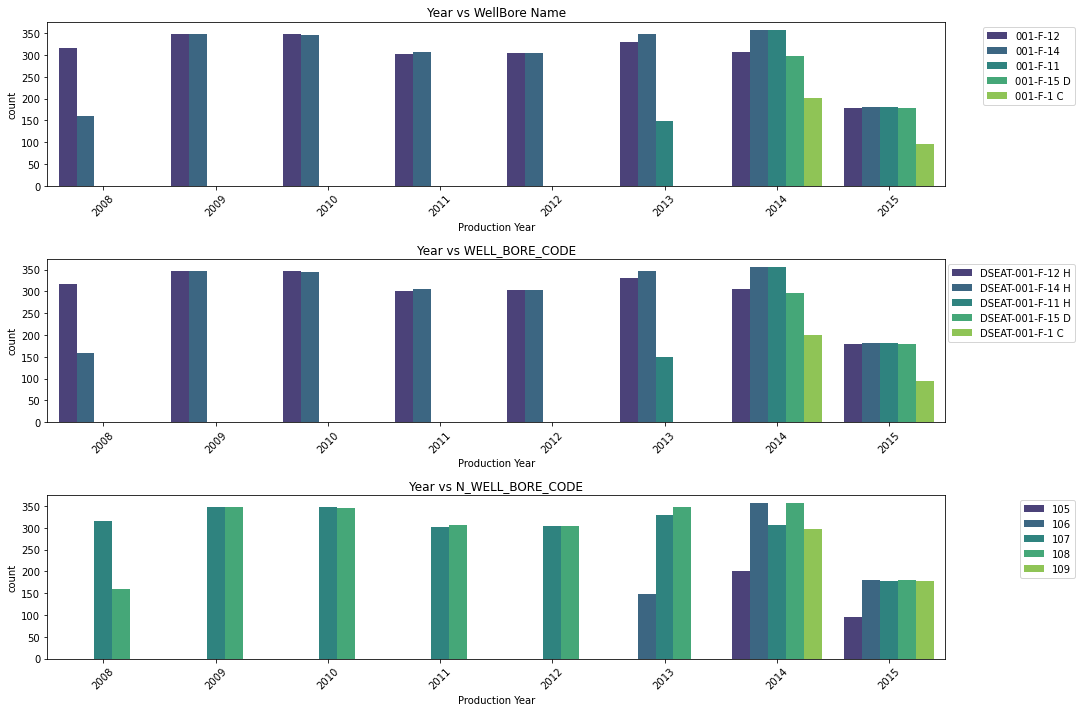

In [31]:
# Inspect visually; the relationship between the categorical features with time

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Plot the relationship between year and WellBore Name
plt.subplot(3, 1, 1)
sns.countplot(data=df_temp, x= 'Production Year', hue='WellBore Name', palette='viridis')
plt.title('Year vs WellBore Name')
plt.xticks(rotation=45)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

# Plot the relationship between year and WELL_BORE_CODE
plt.subplot(3, 1, 2)
sns.countplot(data=df_temp, x='Production Year', hue='WELL_BORE_CODE', palette='viridis')
plt.title('Year vs WELL_BORE_CODE')
plt.xticks(rotation=45)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

# Plot the relationship between year and N_WELL_BORE_CODE
plt.subplot(3, 1, 3)
sns.countplot(data=df_temp, x='Production Year', hue='N_WELL_BORE_CODE', palette='viridis')
plt.title('Year vs N_WELL_BORE_CODE')
plt.xticks(rotation=45)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

plt.tight_layout()

The visualizations above illustrate the distribution of three categorical features ("WellBore Name", "WELL_BORE_CODE", and "N_WELL_BORE_CODE") across different years.

### Year vs WellBore:
- **Plot Description**: This plot depicts the count of various "WellBore Name" values for each year.
- **Distinct WellBore Names**: The dataset includes five distinct WellBore Names: `001-F-11`, `001-F-12`, `001-F-14`, `001-F-1 C`, and `001-F-15 D`.
- **Chronological Appearance**:
  - `001-F-12` and `001-F-14` are the oldest wells, both appearing since 2008.
  - `001-F-11` follows in terms of relative age.
  - `001-F-11` first appears in 2013, while `001-F-15 D` and `001-F-1 C` make their first appearance in 2014.
- **Yearly Occurrence**: Each WellBore Name continues to appear in subsequent years after its initial occurrence. Consequently, `001-F-12` and `001-F-14` are present across all years in the dataset.

### Detailed WellBore Analysis:
From previous analyses, the following insights have been delineated:
- **WellBore `001-F-12`**:
  - **WELL_BORE_CODE**: `DSEAT-001-F-12 H`
  - **N_WELL_BORE_CODE**: 107
  - **Data Points**: 2433 (highest in the dataset)
- **WellBore `001-F-14`**:
  - **WELL_BORE_CODE**: `DSEAT-001-F-14 H`
  - **N_WELL_BORE_CODE**: 108
  - **Data Points**: 2349 (second highest)
- **WellBore `001-F-11`**:
  - **WELL_BORE_CODE**: `DSEAT-001-F-11 H`
  - **N_WELL_BORE_CODE**: 106
  - **Data Points**: 687 (third highest)
- **WellBore `001-F-15 D`**:
  - **WELL_BORE_CODE**: `DSEAT-001-F-15 D`
  - **N_WELL_BORE_CODE**: 109
  - **Data Points**: 476 (fourth highest)
- **WellBore `001-F-1 C`**:
  - **WELL_BORE_CODE**: `DSEAT-001-F-1 C`
  - **N_WELL_BORE_CODE**: 105
  - **Data Points**: 296 (fifth highest)

### Conclusion:
These visualizations provide a comprehensive view of how the categorical features are distributed over time, and I've now been able to identify temporal dynamics and operational history of the wellbores to an extent.

In [32]:
display(df_temp['WellBore Name'].value_counts())
display(df_temp['WELL_BORE_CODE'].value_counts())
display(df_temp['N_WELL_BORE_CODE'].value_counts())

001-F-12      2433
001-F-14      2349
001-F-11       687
001-F-15 D     476
001-F-1 C      296
Name: WellBore Name, dtype: int64

DSEAT-001-F-12 H    2433
DSEAT-001-F-14 H    2349
DSEAT-001-F-11 H     687
DSEAT-001-F-15 D     476
DSEAT-001-F-1 C      296
Name: WELL_BORE_CODE, dtype: int64

107    2433
108    2349
106     687
109     476
105     296
Name: N_WELL_BORE_CODE, dtype: int64

### 1. Find Yearly Production

In [33]:
# Create a new dataframe for yearly production
df_yearly = df_temp.groupby(['Production Year']).agg({
    'Oil Production (stb/day)': 'sum',
    'Gas Volume (scf/day)': 'sum',
    'Water Production (stb/day)': 'sum'
}).reset_index()

In [34]:
df_yearly

,Production Year,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
0,2008,1.109792e+07,9.073462e+09,1.478712e+05
1,2009,1.688483e+07,1.327217e+10,1.459933e+06
2,2010,1.062949e+07,8.611378e+09,1.187297e+07
3,2011,5.333702e+06,4.600303e+09,1.377913e+07
4,2012,3.611758e+06,3.184365e+09,1.326939e+07
5,2013,3.492222e+06,3.076957e+09,1.620534e+07
6,2014,4.674146e+06,3.946253e+09,1.708409e+07
7,2015,3.084576e+06,2.547651e+09,5.684150e+06


#### Find which year had the highest total production

In [35]:
# Add a new column for cumulative production
df_yearly['Total Production'] = df_yearly['Oil Production (stb/day)'] + df_yearly['Gas Volume (scf/day)'] + df_yearly['Water Production (stb/day)']

# Sort the dataframe in descending order based on the cumulative production
df_yearly = df_yearly.sort_values(by='Total Production', ascending=False)


df_yearly

,Production Year,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day),Total Production
1,2009,1.688483e+07,1.327217e+10,1.459933e+06,1.329051e+10
0,2008,1.109792e+07,9.073462e+09,1.478712e+05,9.084708e+09
2,2010,1.062949e+07,8.611378e+09,1.187297e+07,8.633880e+09
3,2011,5.333702e+06,4.600303e+09,1.377913e+07,4.619416e+09
6,2014,4.674146e+06,3.946253e+09,1.708409e+07,3.968011e+09
4,2012,3.611758e+06,3.184365e+09,1.326939e+07,3.201246e+09
5,2013,3.492222e+06,3.076957e+09,1.620534e+07,3.096654e+09
7,2015,3.084576e+06,2.547651e+09,5.684150e+06,2.556420e+09


We can see that the year with the highest yearly total production (i.e., cumulative of oil, gas, and water production) is 2009, and the year with the lowest total production is 2015.

### 2. Visualize Production Volumes Per Year

### Visualize Oil Production Per Year

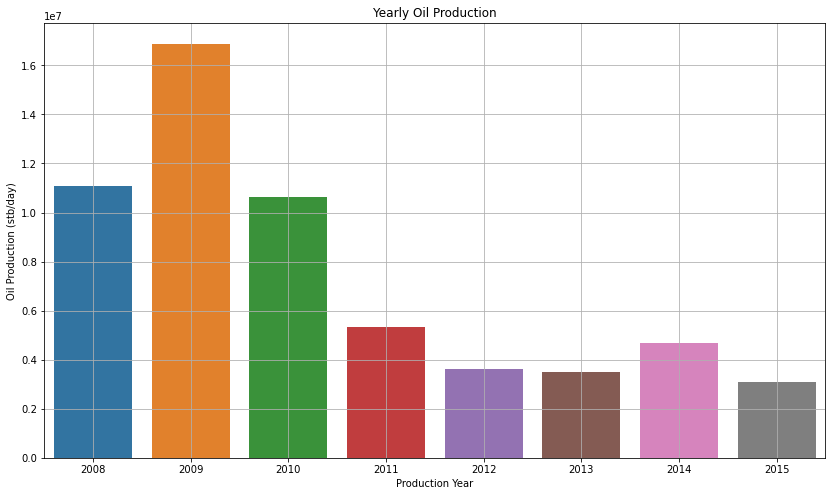

In [36]:
# Plot the oil production per year
plt.figure(figsize=(14, 8))
sns.barplot(data=df_yearly, x='Production Year', y='Oil Production (stb/day)', ci=None)
plt.title('Yearly Oil Production')
plt.xlabel('Production Year')
plt.ylabel('Oil Production (stb/day)')
plt.grid(True)
plt.show()

### Visualize Gas Production Per Year

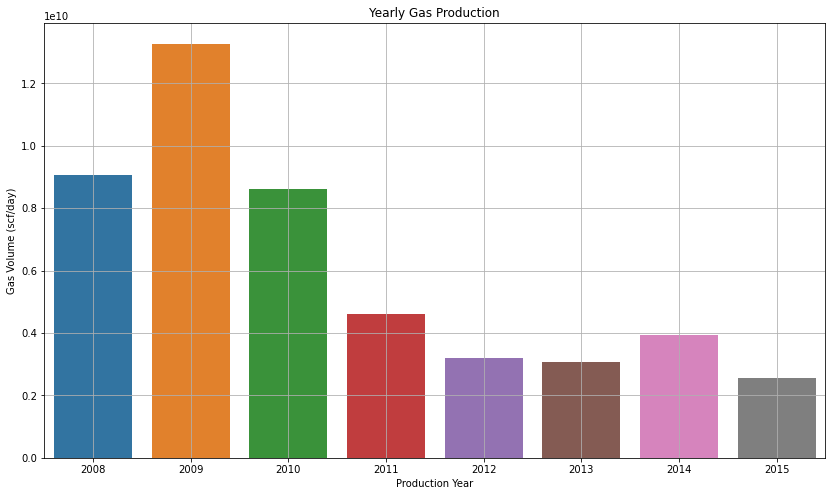

In [37]:
# Plot the gas production per day
plt.figure(figsize=(14, 8))
sns.barplot(data=df_yearly, x='Production Year', y='Gas Volume (scf/day)', ci=None)
plt.title('Yearly Gas Production')
plt.xlabel('Production Year')
plt.ylabel('Gas Volume (scf/day)')
plt.grid(True)
plt.show()

### Visualize Yearly Water Production

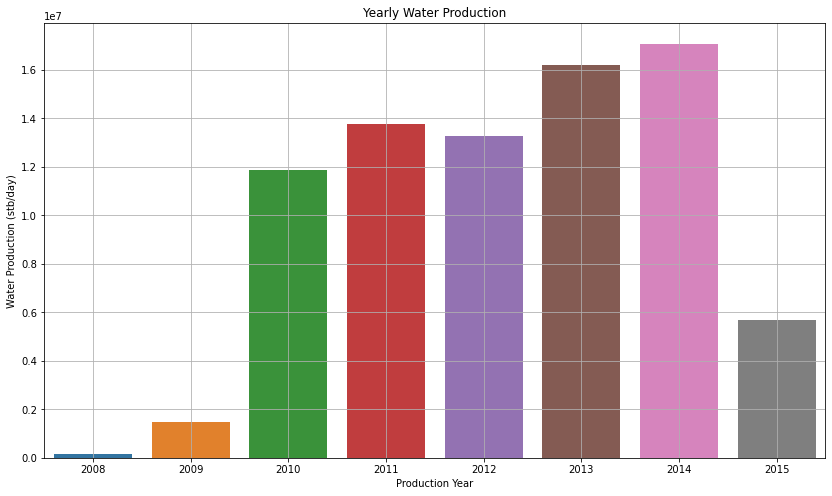

In [38]:
# Plot the water production per year
plt.figure(figsize=(14, 8))
sns.barplot(data=df_yearly, x='Production Year', y='Water Production (stb/day)', ci=None)
plt.title('Yearly Water Production')
plt.xlabel('Production Year')
plt.ylabel('Water Production (stb/day)')
plt.grid(True)
plt.show()

The years 2008, 2009, and 2010 were the peak years for oil and gas production. A notable decline in production levels occurred after 2010, with 2015 marking the lowest production year.

Conversely, water production reached its highest levels in 2014, followed by a significant decrease post-2014. The lowest water production was recorded in 2008, followed by 2009. The plot of yearly water production levels generally indicates an upward trend from 2008 to 2014.

### Oil Production Per Wellbore Per Year

In [39]:
# Group by 'Production Year' and 'WellBore Name' to find the production rates of oil, gas, and water per year for each wellbore
df_yearly = train_data_zero_values.groupby([train_data_zero_values['PRODUCTION DATE'].dt.year, 'WellBore Name']).agg({
    'Oil Production (stb/day)': 'mean',
    'Gas Volume (scf/day)': 'mean',
    'Water Production (stb/day)': 'mean'
}).reset_index()

# Rename the columns for clarity
df_yearly.rename(columns={'PRODUCTION DATE': 'Production Year'}, inplace=True)

# Display the first few rows of the resulting dataframe
df_yearly

,Production Year,WellBore Name,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
0,2008,001-F-12,4492.632500,3.811888e+06,8.689186
1,2008,001-F-14,11543.292553,9.301775e+06,19.184695
2,2009,001-F-12,23815.709936,1.907120e+07,288.539772
3,2009,001-F-14,20187.972196,1.589250e+07,3105.612437
4,2010,001-F-12,8427.128003,7.181617e+06,19274.755347
5,2010,001-F-14,14338.293950,1.165979e+07,17254.674939
6,2011,001-F-12,6359.603156,5.446700e+06,19851.240000
7,2011,001-F-14,9514.511029,8.244678e+06,21158.067623
8,2012,001-F-12,4252.762408,3.807919e+06,25230.662689
9,2012,001-F-14,6389.746877,5.559840e+06,13256.885115


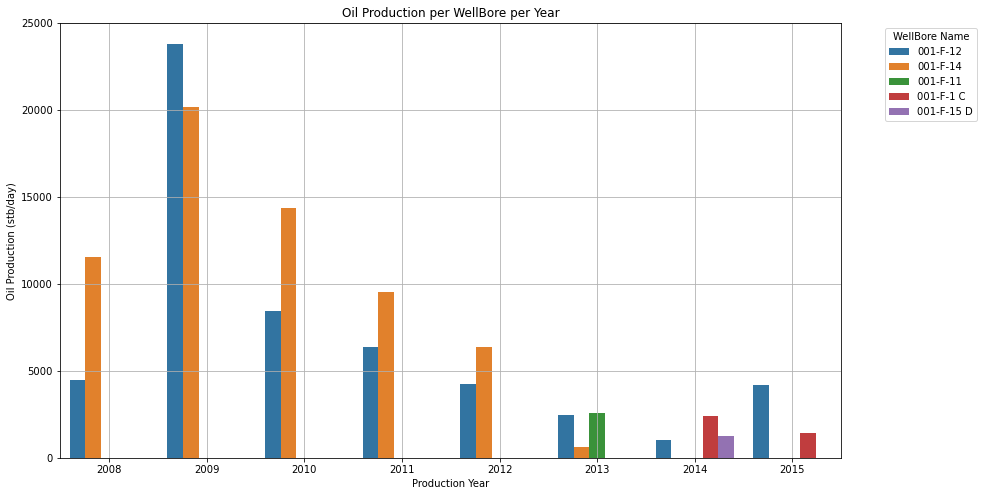

In [40]:
# Plot the oil production per wellbore per year
plt.figure(figsize=(14, 8))
sns.barplot(data=df_yearly, x='Production Year', y='Oil Production (stb/day)', hue='WellBore Name', ci=None)
plt.title('Oil Production per WellBore per Year')
plt.xlabel('Production Year')
plt.ylabel('Oil Production (stb/day)')
plt.legend(title='WellBore Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

### Gas Production Per Wellbore Per Year

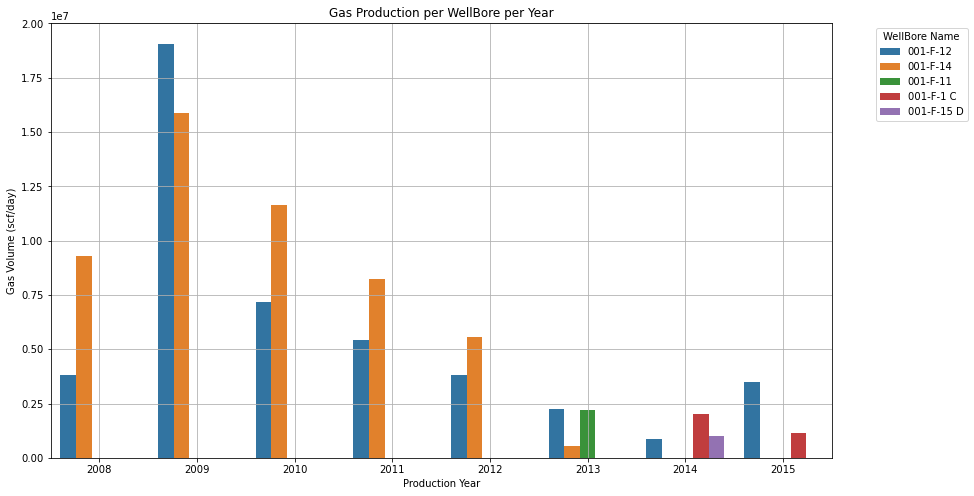

In [42]:
# Plot the gas production per wellbore per year
plt.figure(figsize=(14, 8))
sns.barplot(data=df_yearly, x='Production Year', y='Gas Volume (scf/day)', hue='WellBore Name', ci=None)
plt.title('Gas Production per WellBore per Year')
plt.xlabel('Production Year')
plt.ylabel('Gas Volume (scf/day)')
plt.legend(title='WellBore Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

### Water Production Per Wellbore Per Year

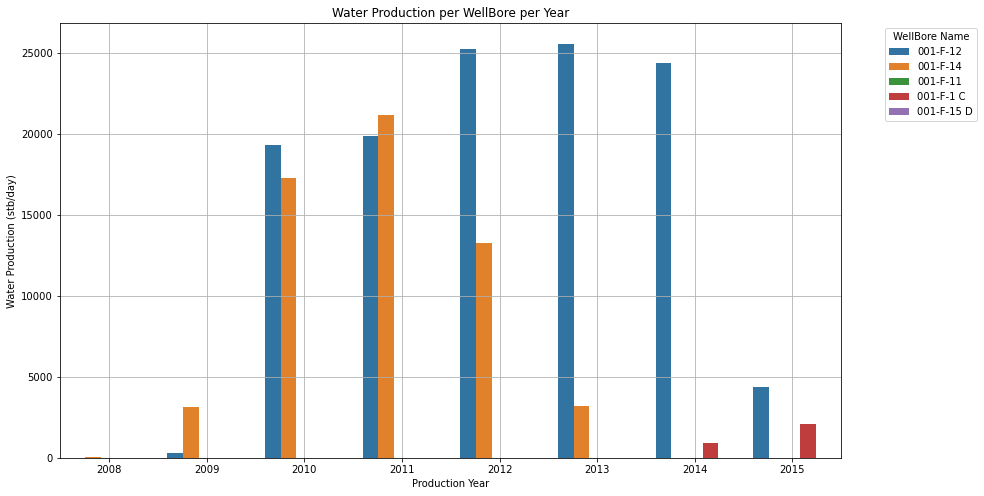

In [43]:
# Plot the water production per wellbore per year
plt.figure(figsize=(14, 8))
sns.barplot(data=df_yearly, x='Production Year', y='Water Production (stb/day)', hue='WellBore Name', ci=None)
plt.title('Water Production per WellBore per Year')
plt.xlabel('Production Year')
plt.ylabel('Water Production (stb/day)')
plt.legend(title='WellBore Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

WellBore `001-F-12` has demonstrated the highest cumulative water production across all years.

### 3. Production Volumes Per Wellbore and Most Prolific Wellbore

In [44]:
# Find the wellbore name that has produced the most oil, gas, and water

# Sum the production volumes for each wellbore
wellbore_production_totals = df_yearly.groupby('WellBore Name').sum()

# Find the wellbore with the maximum oil production
max_oil_wellbore = wellbore_production_totals['Oil Production (stb/day)'].idxmax()
max_oil_production = wellbore_production_totals['Oil Production (stb/day)'].max()

# Find the wellbore with the maximum gas production
max_gas_wellbore = wellbore_production_totals['Gas Volume (scf/day)'].idxmax()
max_gas_production = wellbore_production_totals['Gas Volume (scf/day)'].max()

# Find the wellbore with the maximum water production
max_water_wellbore = wellbore_production_totals['Water Production (stb/day)'].idxmax()
max_water_production = wellbore_production_totals['Water Production (stb/day)'].max()

# Display the results
display(f"The wellbore that has produced the most oil is: {max_oil_wellbore}")
display(f"The total oil production from that wellbore is: {max_oil_production} (stb/7 years)")
display(f"The wellbore that has produced the most gas is: {max_gas_wellbore}")
display(f"The total gas production from that wellbore is: {max_gas_production}(scf/7 years)")
display(f'The wellbore that has produced the most water is: {max_water_wellbore}')
display(f"The total water production from that wellbore is: {max_water_production}(stb/7 years)")

'The wellbore that has produced the most oil is: 001-F-14'

'The total oil production from that wellbore is: 62602.18760475098 (stb/7 years)'

'The wellbore that has produced the most gas is: 001-F-14'

'The total gas production from that wellbore is: 51193871.73086426(scf/7 years)'

'The wellbore that has produced the most water is: 001-F-12'

'The total water production from that wellbore is: 118890.24425876145(stb/7 years)'

### 4. PRODUCTION VOLUME ACROSS ALL YEARS

In [174]:
# Find the cumulative production rates of oil, gas, and water across all years from 2008 to 2015 using the original train_data dataframe
# Calculate total production for oil, gas, and water across all years
total_oil_production = train_data['Oil Production (stb/day)'].sum()
total_gas_production = train_data['Gas Volume (scf/day)'].sum()
total_water_production = train_data['Water Production (stb/day)'].sum()

print(f"Total Oil Production: {total_oil_production} stb")
print(f"Total Gas Production: {total_gas_production} scf")
print(f"Total Water Production: {total_water_production} stb")

Total Oil Production: 58826313.579 stb
Total Gas Production: 48327425355.451996 scf
Total Water Production: 79502873.22209999 stb


### 5. UNIVARIATE ANALYSIS OF TARGET VARIABLES

Univariate Analysis for Oil Production (stb/day):
count     6241.000000
mean      9422.950956
std       8927.388744
min          0.000000
25%       2635.321300
50%       6520.151100
75%      12986.396900
max      37122.573600
Name: Oil Production (stb/day), dtype: float64


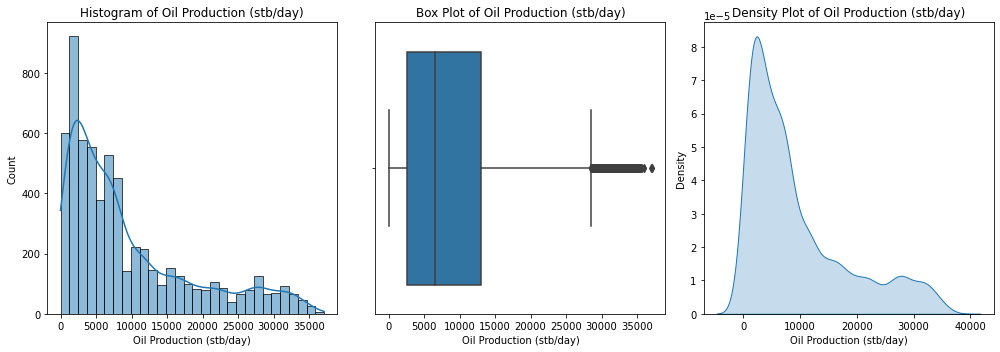

Univariate Analysis for Gas Volume (scf/day):
count    6.241000e+03
mean     7.741153e+06
std      7.074669e+06
min      2.502770e+02
25%      2.249719e+06
50%      5.609234e+06
75%      1.084257e+07
max      3.004494e+07
Name: Gas Volume (scf/day), dtype: float64


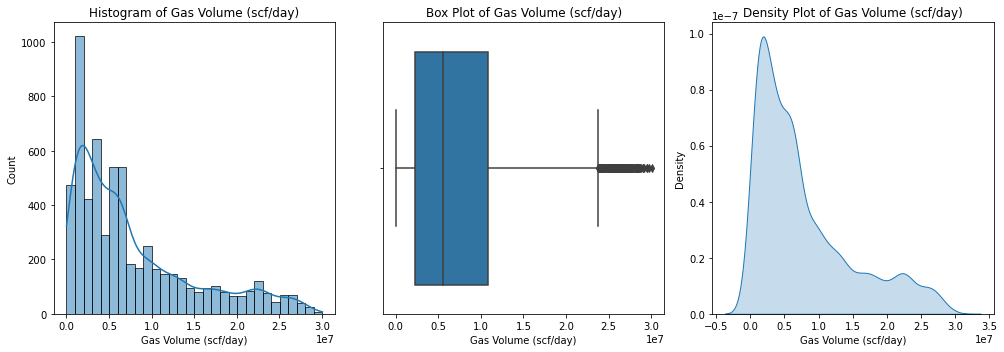

Univariate Analysis for Water Production (stb/day):
count     6241.000000
mean     12738.803593
std      11415.767334
min      -2879.813600
25%        735.615500
50%      12862.672600
75%      22789.173200
max      50444.164600
Name: Water Production (stb/day), dtype: float64


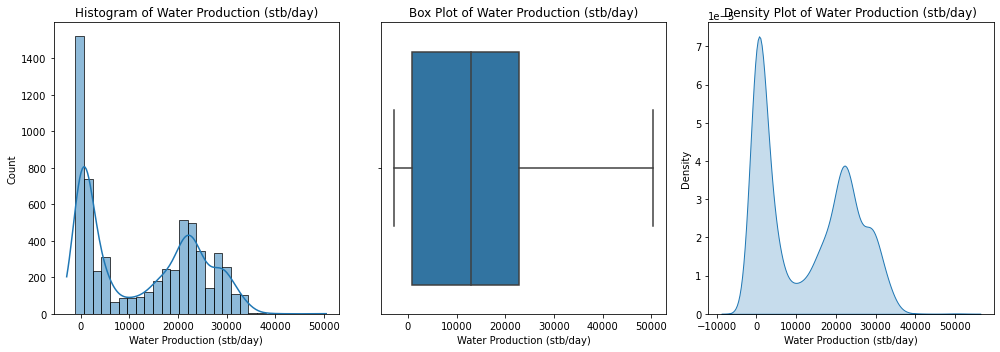

In [45]:
# Define target variables
target_variables = ['Oil Production (stb/day)', 'Gas Volume (scf/day)', 'Water Production (stb/day)']

# Perform univariate analysis for each target variable
for target in target_variables:
    print(f'Univariate Analysis for {target}:')

    # Descriptive statistics
    print(df_temp[target].describe())

    # Visualization
    plt.figure(figsize=(14, 5))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df_temp[target], bins=30, kde=True)
    plt.title(f'Histogram of {target}')

    # Box Plot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=df_temp[target])
    plt.title(f'Box Plot of {target}')

    # Density Plot
    plt.subplot(1, 3, 3)
    sns.kdeplot(df_temp[target], shade=True)
    plt.title(f'Density Plot of {target}')

    plt.tight_layout()
    plt.show();

### 6. CORRELATION ANALYSIS

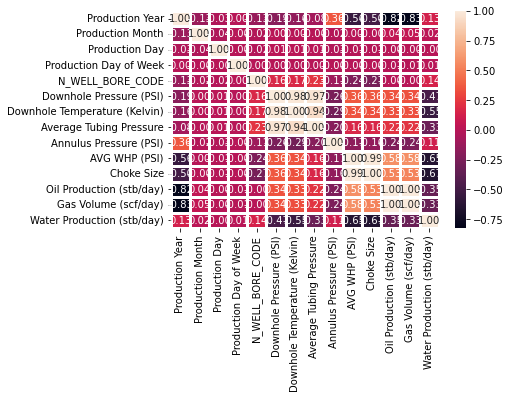

In [46]:
# Ensure that only numeric columns are used for the correlation matrix
numeric_df_temp = df_temp.select_dtypes(include=[np.number])
sns.heatmap(numeric_df_temp.corr(), annot=True, fmt='.2f', linewidths=3);

In [47]:
# Calculate the correlation matrix using Pearson method
correlation = numeric_df_temp.corr(method='pearson')

# Filter the correlation matrix to show only the correlations of the target variables
target_variables = ['Oil Production (stb/day)', 'Gas Volume (scf/day)', 'Water Production (stb/day)']
correlation_with_targets = correlation[target_variables]

# Display the filtered correlation matrix
correlation_with_targets

,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
Production Year,-0.819863,-0.825141,0.130180
Production Month,0.044218,0.045012,0.020661
Production Day,-0.000439,-0.000272,-0.002494
Production Day of Week,-0.007934,-0.008096,0.005848
N_WELL_BORE_CODE,-0.001596,-0.003657,0.140722
Downhole Pressure (PSI),0.338518,0.336463,-0.471134
Downhole Temperature (Kelvin),0.330333,0.326474,-0.550570
Average Tubing Pressure,0.218257,0.217098,-0.325961
Annulus Pressure (PSI),-0.240525,-0.242675,0.112291
AVG WHP (PSI),0.582834,0.581858,-0.646973


## 6. DATA PREPROCESSING

In this stage, I will be preprocessing the data to get it ready for model building

In [48]:
df_temp.dtypes.value_counts()

float64    9
int64      5
object     5
dtype: int64

In [49]:
# Convert int32 dtypes in df_temp to int64
df_temp = df_temp.astype({col: 'int64' for col in df_temp.select_dtypes(include='int32').columns})

In [50]:
df_temp.dtypes.value_counts()

float64    9
int64      5
object     5
dtype: int64

In [51]:
display(df_temp.columns)
display(len(df_temp.columns.to_list()))

Index(['Production Year', 'Production Month', 'Production Day',
       'Production Day of Week', 'Field Name', 'WELL_BORE_CODE',
       'N_WELL_BORE_CODE', 'WellBore Name', 'FLOW_KIND', 'WELL_TYPE',
       'Downhole Pressure (PSI)', 'Downhole Temperature (Kelvin)',
       'Average Tubing Pressure', 'Annulus Pressure (PSI)', 'AVG WHP (PSI)',
       'Choke Size', 'Oil Production (stb/day)', 'Gas Volume (scf/day)',
       'Water Production (stb/day)'],
      dtype='object')

19

In [52]:
# Find the object type columns in the dataset
object_columns = df_temp.select_dtypes(include='object').columns
object_columns

Index(['Field Name', 'WELL_BORE_CODE', 'WellBore Name', 'FLOW_KIND',
       'WELL_TYPE'],
      dtype='object')

In [53]:
# Find the unique data points in each of the object type columns
unique_data_points = {col: df_temp[col].unique() for col in object_columns}
unique_data_points

{'Field Name': array(['DSEAT'], dtype=object),
 'WELL_BORE_CODE': array(['DSEAT-001-F-12 H', 'DSEAT-001-F-14 H', 'DSEAT-001-F-11 H',
        'DSEAT-001-F-15 D', 'DSEAT-001-F-1 C'], dtype=object),
 'WellBore Name': array(['001-F-12', '001-F-14', '001-F-11', '001-F-15 D', '001-F-1 C'],
       dtype=object),
 'FLOW_KIND': array(['production'], dtype=object),
 'WELL_TYPE': array(['OP', 'WI'], dtype=object)}

From our previous analysis, we've identified that `WellBore Name`, `WELL_BORE_CODE`, and `N_WELL_BORE_CODE` serve as unique identifiers for the same entity. To streamline our dataset, we'll retain `N_WELL_BORE_CODE` since it's already in a numerical format, eliminating the need for further encoding. Consequently, we'll drop `WellBore Name` and `WELL_BORE_CODE`.

Additionally, we'll remove `Field Name` and `Flow Kind` from our dataset as they each contain only a single unique value, offering no variability for our analysis. I will also drop `Production Day of the Week`

**Interesting Insight:** Our data reveals two distinct well types: OP (Oil Producing) and WI (Well Injection). A particularly intriguing discovery is that out of 6241 wells, only one is a Water Injection well, while the remaining 6240 are Oil Producing wells. Could it be a mistake in the data or it was intentional?

In [54]:
df_temp.head()

,Production Year,Production Month,Production Day,Production Day of Week,Field Name,WELL_BORE_CODE,N_WELL_BORE_CODE,WellBore Name,FLOW_KIND,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
1188,2008,1,3,3,DSEAT,DSEAT-001-F-12 H,107,001-F-12,production,OP,4159.928094,379.059089,2581.939053,161.755131,1577.989041,75.573165,19300.7392,15799719.44,2.8934
1219,2008,1,4,4,DSEAT,DSEAT-001-F-12 H,107,001-F-12,production,OP,3920.214475,379.039148,2507.459404,166.307097,1412.755070,66.386227,19251.1740,16161652.45,17.7378
1248,2008,1,5,5,DSEAT,DSEAT-001-F-12 H,107,001-F-12,production,OP,3781.434990,378.988545,2466.722386,154.188263,1314.712604,58.501582,19924.1411,16633707.70,21.6376
1279,2008,1,6,6,DSEAT,DSEAT-001-F-12 H,107,001-F-12,production,OP,4051.576950,377.973350,2726.427315,4.956245,1325.149635,72.697430,144.2926,414040.76,0.2516
1309,2008,1,7,0,DSEAT,DSEAT-001-F-12 H,107,001-F-12,production,OP,3832.829894,379.337660,2568.051491,170.191785,1264.778403,54.522446,25037.4079,21155137.86,57.7422


In [55]:
# Drop the specified columns from df_temp if they exist
columns_to_drop = ['WellBore Name', 'WELL_BORE_CODE', 'Field Name', 'FLOW_KIND', 'Production Day of Week', 'WELL_TYPE']
df_temp = df_temp.drop(columns=[col for col in columns_to_drop if col in df_temp.columns])

I'm also dropping the `WELL_TYPE` column because the WI has just 1 data point

In [56]:
df_temp.shape

(6241, 13)

In [57]:
check_object_columns = df_temp.select_dtypes(include='object').columns
check_object_columns

Index([], dtype='object')

In [58]:
df_temp.columns

Index(['Production Year', 'Production Month', 'Production Day',
       'N_WELL_BORE_CODE', 'Downhole Pressure (PSI)',
       'Downhole Temperature (Kelvin)', 'Average Tubing Pressure',
       'Annulus Pressure (PSI)', 'AVG WHP (PSI)', 'Choke Size',
       'Oil Production (stb/day)', 'Gas Volume (scf/day)',
       'Water Production (stb/day)'],
      dtype='object')

### Cyclical Transformation for Date columns:
For the month and day columns,I will perform cyclical transformations to capture their cyclical nature. This helps the model understand that after December comes January, and after the 31st comes the 1st.

In [59]:
df_temp['Production_month_sin'] = np.sin(2 * np.pi * df_temp['Production Month'] / 12)
df_temp['Production_month_cos'] = np.cos(2 * np.pi * df_temp['Production Month'] / 12)
df_temp['Production_day_sin'] = np.sin(2 * np.pi * df_temp['Production Day'] / 31)
df_temp['Production_day_cos'] = np.cos(2 * np.pi * df_temp['Production Day'] / 31)

In [60]:
df_temp.columns

Index(['Production Year', 'Production Month', 'Production Day',
       'N_WELL_BORE_CODE', 'Downhole Pressure (PSI)',
       'Downhole Temperature (Kelvin)', 'Average Tubing Pressure',
       'Annulus Pressure (PSI)', 'AVG WHP (PSI)', 'Choke Size',
       'Oil Production (stb/day)', 'Gas Volume (scf/day)',
       'Water Production (stb/day)', 'Production_month_sin',
       'Production_month_cos', 'Production_day_sin', 'Production_day_cos'],
      dtype='object')

In [61]:
df_temp.drop(['Production Month', 'Production Day'], axis=1, inplace=True)
df_temp.columns

Index(['Production Year', 'N_WELL_BORE_CODE', 'Downhole Pressure (PSI)',
       'Downhole Temperature (Kelvin)', 'Average Tubing Pressure',
       'Annulus Pressure (PSI)', 'AVG WHP (PSI)', 'Choke Size',
       'Oil Production (stb/day)', 'Gas Volume (scf/day)',
       'Water Production (stb/day)', 'Production_month_sin',
       'Production_month_cos', 'Production_day_sin', 'Production_day_cos'],
      dtype='object')

In [62]:
# Reorder columns by their names
df_temp = df_temp[['Production Year', 'Production_month_sin', 'Production_month_cos', 'Production_day_sin', 'Production_day_cos', 'N_WELL_BORE_CODE', 'Downhole Pressure (PSI)', 'Downhole Temperature (Kelvin)', 'Average Tubing Pressure', 'Annulus Pressure (PSI)', 'AVG WHP (PSI)', 'Choke Size', 'Oil Production (stb/day)', 'Gas Volume (scf/day)', 'Water Production (stb/day)']]

df_temp

,Production Year,Production_month_sin,Production_month_cos,Production_day_sin,Production_day_cos,N_WELL_BORE_CODE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
1188,2008,5.000000e-01,0.866025,0.571268,0.820763,107,4159.928094,379.059089,2581.939053,161.755131,1577.989041,75.573165,19300.7392,1.579972e+07,2.8934
1219,2008,5.000000e-01,0.866025,0.724793,0.688967,107,3920.214475,379.039148,2507.459404,166.307097,1412.755070,66.386227,19251.1740,1.616165e+07,17.7378
1248,2008,5.000000e-01,0.866025,0.848644,0.528964,107,3781.434990,378.988545,2466.722386,154.188263,1314.712604,58.501582,19924.1411,1.663371e+07,21.6376
1279,2008,5.000000e-01,0.866025,0.937752,0.347305,107,4051.576950,377.973350,2726.427315,4.956245,1325.149635,72.697430,144.2926,4.140408e+05,0.2516
1309,2008,5.000000e-01,0.866025,0.988468,0.151428,107,3832.829894,379.337660,2568.051491,170.191785,1264.778403,54.522446,25037.4079,2.115514e+07,57.7422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,2015,-2.449294e-16,1.000000,0.937752,0.347305,105,3769.841687,381.094950,3284.975236,0.000000,484.866452,5.694804,1338.8265,1.096232e+06,8097.5573
6906,2015,-2.449294e-16,1.000000,0.937752,0.347305,109,2900.965011,379.422346,2452.984213,193.032377,447.980799,2.266941,772.0975,6.321888e+05,57.2390
6373,2015,-2.449294e-16,1.000000,0.937752,0.347305,108,3853.658055,372.643576,3413.720234,211.582589,439.937821,1.815075,1295.2997,1.060602e+06,19980.6882
3762,2015,-2.449294e-16,1.000000,0.937752,0.347305,107,0.000000,273.150000,430.390024,392.767886,430.390024,0.958451,4415.7687,3.615688e+06,7093.7991


In [63]:
display(df_temp.columns)
display(len(df_temp.columns.to_list()))

Index(['Production Year', 'Production_month_sin', 'Production_month_cos',
       'Production_day_sin', 'Production_day_cos', 'N_WELL_BORE_CODE',
       'Downhole Pressure (PSI)', 'Downhole Temperature (Kelvin)',
       'Average Tubing Pressure', 'Annulus Pressure (PSI)', 'AVG WHP (PSI)',
       'Choke Size', 'Oil Production (stb/day)', 'Gas Volume (scf/day)',
       'Water Production (stb/day)'],
      dtype='object')

15

The cyclical features ('Production_month_sin', 'Production_month_cos', 'Production_day_sin', 'Production_day_cos'), do not need to further scaling. These features were transformed from the original datetime features ('Production Date') to handle their cyclical nature (day and month), making them suitable for direct use in machine learning models without additional scaling.

The target variables ('Oil Production (stb/day)', 'Gas Volume (scf/day)', 'Water Production (stb/day)') are separated from the feature matrix before scaling. You typically do not scale your target variables.



### Scaling the data

In [64]:
from sklearn.preprocessing import MinMaxScaler

# Select columns for scaling
columns_to_scale = ['Production Year', 'N_WELL_BORE_CODE', 'Downhole Pressure (PSI)', 'Downhole Temperature (Kelvin)', 'Average Tubing Pressure', 'Annulus Pressure (PSI)', 'AVG WHP (PSI)', 'Choke Size']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
df_temp_scaled = df_temp.copy()  # Create a copy of your dataframe
df_temp_scaled[columns_to_scale] = scaler.fit_transform(df_temp[columns_to_scale]) 

# Check the scaled dataframe
df_temp_scaled.head()

,Production Year,Production_month_sin,Production_month_cos,Production_day_sin,Production_day_cos,N_WELL_BORE_CODE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
1188,0.0,0.5,0.866025,0.571268,0.820763,0.5,0.911409,0.976101,0.687277,0.371605,0.900224,0.712718,19300.7392,15799719.44,2.8934
1219,0.0,0.5,0.866025,0.724793,0.688967,0.5,0.858889,0.975917,0.667451,0.382063,0.805960,0.626078,19251.1740,16161652.45,17.7378
1248,0.0,0.5,0.866025,0.848644,0.528964,0.5,0.828484,0.975451,0.656608,0.354222,0.750028,0.551719,19924.1411,16633707.70,21.6376
1279,0.0,0.5,0.866025,0.937752,0.347305,0.5,0.887670,0.966094,0.725738,0.011386,0.755982,0.685598,144.2926,414040.76,0.2516
1309,0.0,0.5,0.866025,0.988468,0.151428,0.5,0.839744,0.978668,0.683580,0.390987,0.721541,0.514192,25037.4079,21155137.86,57.7422


### Train Test Split Strategy

Given the dataset spans from 2008 to 2015 for training:

**Temporal Split:**

I will split the data so that training data covers 2008 to 2013, and validation/testing data covers 2014 to 2015. This way, your model trains on earlier data and validates on more recent data.

**Randomization with Temporal Awareness:**

I will use a combination of train_test_split with `shuffle=False` to maintain the temporal order of the data while splitting into training and validation sets.

**Split into features (X) and target variables (y)**

In [65]:
from sklearn.model_selection import train_test_split

# Temporal split: Training (2008-2013), Validation (2014-2015)
X = df_temp_scaled.drop(['Oil Production (stb/day)', 'Gas Volume (scf/day)', 'Water Production (stb/day)'], axis=1)
y = df_temp_scaled[['Oil Production (stb/day)', 'Gas Volume (scf/day)', 'Water Production (stb/day)']]


**Split the Data into Training and Validation Sets**

In [66]:
from sklearn.model_selection import train_test_split

# Temporal split: Training (2008-2013), Validation (2014-2015)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)

## 7. MODEL BUILDING

I will first build baseline models; then improve the best performing baseline models via hyperparameter tuning

#### Multi-Output Regression Models

We are dealing with a multioutput regression problem because we have three target variables

I'll explore a few regression algorithms:

- Random Forest Regressor
- Gradient Boosting Regressor
- Extra Trees Regressor
- XGBoost Regressor

**Random Forest Regressor**

In [77]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize MultiOutputRegressor with RandomForestRegressor
forest_regressor = MultiOutputRegressor(RandomForestRegressor(random_state=42))

# Fit the model
forest_regressor.fit(X_train, y_train)

# Predict on validation set
y_pred_forest = forest_regressor.predict(X_val)

# # Evaluate the model
# metrics = {
#     "RMSE": mean_squared_error,
#     "R-squared": r2_score,
#     "MAE": mean_absolute_error
# }

# results = {}
# for metric_name, metric_func in metrics.items():
#     results[metric_name] = {
#         "Oil Production": metric_func(y_val['Oil Production (stb/day)'], y_pred_forest[:, 0]),
#         "Gas Volume": metric_func(y_val['Gas Volume (scf/day)'], y_pred_forest[:, 1]),
#         "Water Production": metric_func(y_val['Water Production (stb/day)'], y_pred_forest[:, 2])
#     }

# results

# Evaluate the model
print("Random Forest Regressor Metrics:")

# RMSE for each target variable
print("RMSE - Oil Production:", (mean_squared_error(y_val['Oil Production (stb/day)'], y_pred_forest[:, 0], squared=False)))
print("RMSE - Gas Volume:", (mean_squared_error(y_val['Gas Volume (scf/day)'], y_pred_forest[:, 1], squared=False)))
print("RMSE - Water Production:", (mean_squared_error(y_val['Water Production (stb/day)'], y_pred_forest[:, 2], squared=False)))

# R-squared for each target variable
print("R-squared - Oil Production:", r2_score(y_val['Oil Production (stb/day)'], y_pred_forest[:, 0]))
print("R-squared - Gas Volume:", r2_score(y_val['Gas Volume (scf/day)'], y_pred_forest[:, 1]))
print("R-squared - Water Production:", r2_score(y_val['Water Production (stb/day)'], y_pred_forest[:, 2]))

 # MAE for each target variable
print("MAE - Oil Production:", mean_absolute_error(y_val['Oil Production (stb/day)'], y_pred_forest[:, 0]))
print("MAE - Gas Volume:", mean_absolute_error(y_val['Gas Volume (scf/day)'], y_pred_forest[:, 1]))
print("MAE - Water Production:", mean_absolute_error(y_val['Water Production (stb/day)'], y_pred_forest[:, 2]))


forest_rmse = mean_squared_error(y_val, y_pred_forest, squared=False, multioutput='uniform_average')
forest_r2 = r2_score(y_val, y_pred_forest, multioutput='uniform_average')
forest_mae = mean_absolute_error(y_val, y_pred_forest, multioutput='uniform_average') 
print("Overall RMSE:", forest_rmse)
print("Overall R-squared:", forest_r2)
print("Overall MAE:", forest_mae)    

Random Forest Regressor Metrics:
RMSE - Oil Production: 2153.831939021294
RMSE - Gas Volume: 2105114.2618184863
RMSE - Water Production: 7736.46017909903
R-squared - Oil Production: 0.48511408565655134
R-squared - Gas Volume: 0.27314666811951216
R-squared - Water Production: 0.3758407229865053
MAE - Oil Production: 1257.0308394187348
MAE - Gas Volume: 1173947.990122578
MAE - Water Production: 5233.839622659731
Overall RMSE: 705001.5179788688
Overall R-squared: 0.3780338255875229
Overall MAE: 393479.6201948856


#### Gradient Boosting Regressor

In [79]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize MultiOutputRegressor with GradientBoostingRegressor
gb_regressor = MultiOutputRegressor(GradientBoostingRegressor(random_state=42))

# Fit the model
gb_regressor.fit(X_train, y_train)

# Predict on validation set
y_pred_gb = gb_regressor.predict(X_val)

# Evaluate the model
print("Gradient Boosting Regressor Metrics:")

# RMSE for each target variable
print("RMSE - Oil Production:", (mean_squared_error(y_val['Oil Production (stb/day)'], y_pred_gb[:, 0], squared=False)))
print("RMSE - Gas Volume:", (mean_squared_error(y_val['Gas Volume (scf/day)'], y_pred_gb[:, 1], squared=False)))
print("RMSE - Water Production:", (mean_squared_error(y_val['Water Production (stb/day)'], y_pred_gb[:, 2], squared=False)))

# R-squared for each target variable
print("R-squared - Oil Production:", r2_score(y_val['Oil Production (stb/day)'], y_pred_gb[:, 0]))
print("R-squared - Gas Volume:", r2_score(y_val['Gas Volume (scf/day)'], y_pred_gb[:, 1]))
print("R-squared - Water Production:", r2_score(y_val['Water Production (stb/day)'], y_pred_gb[:, 2]))

 # MAE for each target variable
print("MAE - Oil Production:", mean_absolute_error(y_val['Oil Production (stb/day)'], y_pred_gb[:, 0]))
print("MAE - Gas Volume:", mean_absolute_error(y_val['Gas Volume (scf/day)'], y_pred_gb[:, 1]))
print("MAE - Water Production:", mean_absolute_error(y_val['Water Production (stb/day)'], y_pred_gb[:, 2]))

gb_rmse = mean_squared_error(y_val, y_pred_gb, squared=False, multioutput='uniform_average')
gb_r2 = r2_score(y_val, y_pred_gb, multioutput='uniform_average')
gb_mae = mean_absolute_error(y_val, y_pred_gb, multioutput='uniform_average')
print("Overall RMSE:", gb_rmse)
print("Overall R-squared:", gb_r2)
print("Overall MAE:", gb_mae)

Gradient Boosting Regressor Metrics:
RMSE - Oil Production: 2376.327604177789
RMSE - Gas Volume: 1932361.1233875428
RMSE - Water Production: 6654.759389417869
R-squared - Oil Production: 0.3732418191552346
R-squared - Gas Volume: 0.38754805045239094
R-squared - Water Production: 0.5381770019733627
MAE - Oil Production: 1575.0581374522988
MAE - Gas Volume: 1281065.1956868507
MAE - Water Production: 4714.243583509475
Overall RMSE: 647130.7367937128
Overall R-squared: 0.43298895719366276
Overall MAE: 429118.1658026041


#### Extra Trees Regressor

In [80]:
from sklearn.ensemble import ExtraTreesRegressor
# Initialize MultiOutputRegressor with ExtraTreesRegressor
et_regressor = MultiOutputRegressor(ExtraTreesRegressor(random_state=42))

# Fit the model
et_regressor.fit(X_train, y_train)                                    

# Predict on validation set
y_pred_et = et_regressor.predict(X_val)

# Evaluate the model
print("Extra Trees Regressor Metrics:")

# RMSE for each target variable
print("RMSE - Oil Production:", np.sqrt(mean_squared_error(y_val['Oil Production (stb/day)'], y_pred_et[:, 0], squared=False)))
print("RMSE - Gas Volume:", np.sqrt(mean_squared_error(y_val['Gas Volume (scf/day)'], y_pred_et[:, 1], squared=False)))
print("RMSE - Water Production:", np.sqrt(mean_squared_error(y_val['Water Production (stb/day)'], y_pred_et[:, 2], squared=False)))

# R-squared for each target variable
print("R-squared - Oil Production:", r2_score(y_val['Oil Production (stb/day)'], y_pred_et[:, 0]))
print("R-squared - Gas Volume:", r2_score(y_val['Gas Volume (scf/day)'], y_pred_et[:, 1]))
print("R-squared - Water Production:", r2_score(y_val['Water Production (stb/day)'], y_pred_et[:, 2]))

 # MAE for each target variable
print("MAE - Oil Production:", mean_absolute_error(y_val['Oil Production (stb/day)'], y_pred_et[:, 0]))
print("MAE - Gas Volume:", mean_absolute_error(y_val['Gas Volume (scf/day)'], y_pred_et[:, 1]))
print("MAE - Water Production:", mean_absolute_error(y_val['Water Production (stb/day)'], y_pred_et[:, 2]))

et_rmse = mean_squared_error(y_val, y_pred_et, squared=False, multioutput='uniform_average')
et_r2 = r2_score(y_val, y_pred_et, multioutput='uniform_average')
et_mae = mean_absolute_error(y_val, y_pred_et, multioutput='uniform_average')
print("Overall RMSE:", et_rmse)
print("Overall R-squared:", et_r2)
print("Overall MAE:", et_mae)

Extra Trees Regressor Metrics:
RMSE - Oil Production: 47.94539935427683
RMSE - Gas Volume: 1370.762686877929
RMSE - Water Production: 78.94525380754592
R-squared - Oil Production: 0.4134903704128158
R-squared - Gas Volume: 0.4209120406617288
R-squared - Water Production: 0.594944118854325
MAE - Oil Production: 1299.4178697638108
MAE - Gas Volume: 1070517.7339597677
MAE - Water Production: 4053.2440479079282
Overall RMSE: 629173.8193849259
Overall R-squared: 0.47644884330962317
Overall MAE: 358623.46529247984


#### XGBoost Regressor

In [82]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [84]:
# %pip install xgboost
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor

# Initialize XGBoost Regressor
xgb_regressor = MultiOutputRegressor(xgb.XGBRegressor(random_state=42))

# Fit the model
xgb_regressor.fit(X_train, y_train)

# Predict on validation set
y_pred_xgb = xgb_regressor.predict(X_val)

# Evaluate the model
print("XGBoost Regressor Metrics:")
print("RMSE - Oil Production:", np.sqrt(mean_squared_error(y_val['Oil Production (stb/day)'], y_pred_xgb[:, 0], squared=False)))
print("RMSE - Gas Volume:", np.sqrt(mean_squared_error(y_val['Gas Volume (scf/day)'], y_pred_xgb[:, 1], squared=False)))
print("RMSE - Water Production:", np.sqrt(mean_squared_error(y_val['Water Production (stb/day)'], y_pred_xgb[:, 2], squared=False)))

# R-squared for each target variable
print("R-squared - Oil Production:", r2_score(y_val['Oil Production (stb/day)'], y_pred_xgb[:, 0]))
print("R-squared - Gas Volume:", r2_score(y_val['Gas Volume (scf/day)'], y_pred_xgb[:, 1]))
print("R-squared - Water Production:", r2_score(y_val['Water Production (stb/day)'], y_pred_xgb[:, 2]))

# MAE for each target variable
print("MAE - Oil Production:", mean_absolute_error(y_val['Oil Production (stb/day)'], y_pred_xgb[:, 0]))
print("MAE - Gas Volume:", mean_absolute_error(y_val['Gas Volume (scf/day)'], y_pred_xgb[:, 1]))
print("MAE - Water Production:", mean_absolute_error(y_val['Water Production (stb/day)'], y_pred_xgb[:, 2]))

xgb_rmse = mean_squared_error(y_val, y_pred_xgb, squared=False, multioutput='uniform_average')
xgb_r2 = r2_score(y_val, y_pred_xgb, multioutput='uniform_average')
xgb_mae = mean_absolute_error(y_val, y_pred_xgb, multioutput='uniform_average')
print("Overall RMSE:", xgb_rmse)
print("Overall R-squared:", xgb_r2)
print("Overall MAE:", xgb_mae)

XGBoost Regressor Metrics:
RMSE - Oil Production: 51.671785832510345
RMSE - Gas Volume: 1424.7794444702097
RMSE - Water Production: 82.46880484974785
R-squared - Oil Production: 0.20877268549336214
R-squared - Gas Volume: 0.3240944664784522
R-squared - Water Production: 0.5176418243541394
MAE - Oil Production: 1568.2537784768854
MAE - Gas Volume: 1226206.9765126852
MAE - Water Production: 4549.814173657611
Overall RMSE: 679822.514203102
Overall R-squared: 0.35016965877531786
Overall MAE: 410775.01482160663


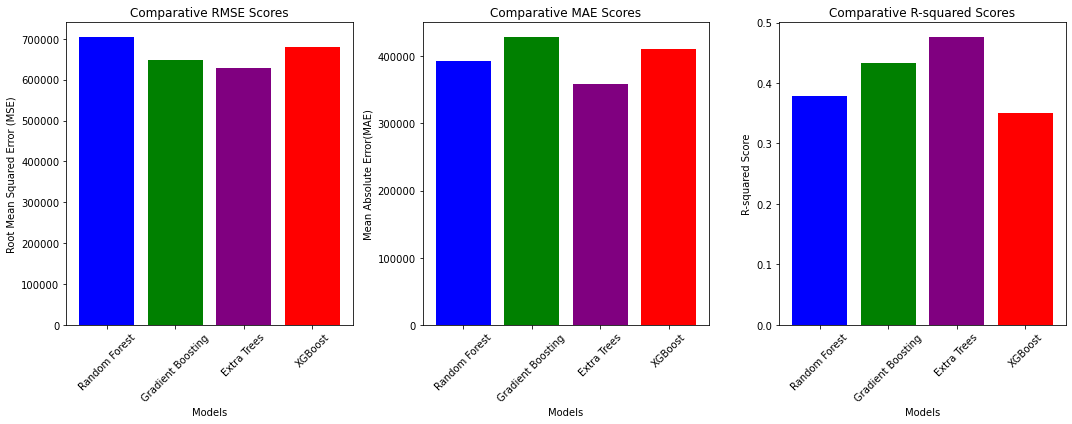

In [205]:
# Create a comparative visualization
plt.figure(figsize=(15, 6))
models = ['Random Forest', 'Gradient Boosting', 'Extra Trees', 'XGBoost']
rmse_scores = [forest_rmse, gb_rmse, et_rmse, xgb_rmse]
mae_scores = [forest_mae, gb_mae, et_mae, xgb_mae]
r2_scores = [forest_r2, gb_r2, et_r2, xgb_r2]

# Plot Root Mean Squared Error (MSE)
plt.subplot(1, 3, 1)
plt.bar(models, rmse_scores, color=['blue', 'green', 'purple', 'red'])
plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error (MSE)')
plt.xticks(rotation=45)  # Rotate the labels
plt.title('Comparative RMSE Scores')

# Plot mae Score 
plt.subplot(1, 3, 2)
plt.bar(models, mae_scores, color=['blue', 'green', 'purple', 'red'])
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error(MAE)')
plt.xticks(rotation=45)  # Rotate the labels
plt.title('Comparative MAE Scores')


# Plot R-squared Score
plt.subplot(1, 3, 3)
plt.bar(models, r2_scores, color=['blue', 'green', 'purple', 'red'])
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.xticks(rotation=45)  # Rotate the labels
plt.title('Comparative R-squared Scores')

plt.tight_layout()
plt.show();

In regression problems, the objective is to minimize the RMSE and MAE scores while maximizing the R-squared score. Based on these criteria, we observe that among the four models evaluated, the Extra Trees Regressor demonstrates the best performance across all metrics. It is followed by the Gradient Boosting Regressor, with the Random Forest Regressor close behind. The XGBoost model shows the poorest performance among the baseline models.

### 8. HYPERPARAMETER TUNING

I'm going to tune the best performing baseline models which are the `ExtraTreesRegressor` and `GradientBoostingRegressor`

In [92]:
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multioutput import MultiOutputRegressor
from scipy.stats import randint
import numpy as np

# Define the parameter grids for both models
param_grid_gb = {
    'estimator__n_estimators': randint(100, 1000),
    'estimator__max_features': ['auto', 'sqrt', 'log2'],
    'estimator__max_depth': randint(10, 50),
    'estimator__min_samples_split': randint(2, 10),
    'estimator__min_samples_leaf': randint(1, 4),
}

param_grid_et = {
    'estimator__n_estimators': randint(100, 1000),
    'estimator__max_features': ['auto', 'sqrt', 'log2'],
    'estimator__max_depth': randint(10, 50),
    'estimator__min_samples_split': randint(2, 10),
    'estimator__min_samples_leaf': randint(1, 4)
}

# Initialize the models
gb = MultiOutputRegressor(GradientBoostingRegressor(random_state=42))
et = MultiOutputRegressor(ExtraTreesRegressor(random_state=42))

# Initialize RandomizedSearchCV
random_search_gb = RandomizedSearchCV(gb, param_distributions=param_grid_gb, 
                                      n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

random_search_et = RandomizedSearchCV(et, param_distributions=param_grid_et, 
                                      n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the models
random_search_gb.fit(X_train, y_train)
random_search_et.fit(X_train, y_train)

# Print the best parameters
print("Best parameters for Gradient Boosting Regressor:")
print(random_search_gb.best_params_)

print("Best parameters for Extra Trees Regressor:")
print(random_search_et.best_params_)

# Evaluate the best model on the test set
best_gb = random_search_gb.best_estimator_
best_et = random_search_et.best_estimator_

gb_pred = best_gb.predict(X_val)
et_pred = best_et.predict(X_val)

# Calculate evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return rmse, r2, mae

gb_metrics = evaluate_model(y_val, gb_pred)
et_metrics = evaluate_model(y_val, et_pred)

print(f"Gradient Boosting Regressor metrics:\n RMSE: {gb_metrics[0]}, R2: {gb_metrics[1]}, MAE: {gb_metrics[2]}")

print(f"Extra Trees Regressor metrics:\n RMSE: {et_metrics[0]}, R2: {et_metrics[1]}, MAE: {et_metrics[2]}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters for Gradient Boosting Regressor:
{'estimator__max_depth': 39, 'estimator__max_features': 'auto', 'estimator__min_samples_leaf': 3, 'estimator__min_samples_split': 9, 'estimator__n_estimators': 580}
Best parameters for Extra Trees Regressor:
{'estimator__max_depth': 48, 'estimator__max_features': 'auto', 'estimator__min_samples_leaf': 2, 'estimator__min_samples_split': 8, 'estimator__n_estimators': 637}
Random Forest Regressor metrics:
 RMSE: 1357108.0457132172, R2: 0.21883895582281584, MAE: 464727.0536074243
Extra Trees Regressor metrics:
 RMSE: 1036899.2436750974, R2: 0.504356392535013, MAE: 365476.3202915334


In [94]:
gb_metrics = evaluate_model(y_val, gb_pred)
et_metrics = evaluate_model(y_val, et_pred)

print(f"Gradient Boosting Regressor metrics:\n RMSE: {gb_metrics[0]}, R2: {gb_metrics[1]}, MAE: {gb_metrics[2]}")

print(f"Extra Trees Regressor metrics:\n RMSE: {et_metrics[0]}, R2: {et_metrics[1]}, MAE: {et_metrics[2]}")

Gradient Boosting Regressor metrics:
 RMSE: 1357108.0457132172, R2: 0.21883895582281584, MAE: 464727.0536074243
Extra Trees Regressor metrics:
 RMSE: 1036899.2436750974, R2: 0.504356392535013, MAE: 365476.3202915334


**Best parameters for the Gradient Boosting Regressor are:**
 {'estimator__max_depth': 39, 'estimator__max_features': 'auto', 'estimator__min_samples_leaf': 3, 
 'estimator__min_samples_split': 9, 'estimator__n_estimators': 580}

**Best parameters for Extra Trees Regressor:**
 {'estimator__max_depth': 48, 'estimator__max_features': 'auto', 'estimator__min_samples_leaf': 2, 
 'estimator__min_samples_split': 8, 'estimator__n_estimators': 637}

### TRAIN BEST BASELINE MODEL WITH BEST HYPERPARAMETERS

In [98]:
X_train.shape, y_train.shape


((4992, 12), (4992, 3))

In [213]:
# Define a function to show the scores of a model
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_val, val_preds),
              "Training RMSE": np.sqrt(mean_squared_error(y_train, train_preds)),
              "Valid RMSE": np.sqrt(mean_squared_error(y_val, val_preds)),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_val, val_preds)}
    return scores

Gradient Boosting Regressor with best hyperparameters

In [146]:
%%time

# Most ideal hyperparameters
ideal_model = MultiOutputRegressor(GradientBoostingRegressor(n_estimators=580,
                                        min_samples_leaf=3,
                                        min_samples_split=9,
                                        max_depth=39,
                                        max_features='sqrt',
                                        random_state=42))

# Fit the ideal model
ideal_model.fit(X_train, y_train)

CPU times: total: 13.9 s
Wall time: 29.5 s


MultiOutputRegressor(estimator=GradientBoostingRegressor(max_depth=39,
                                                         max_features='sqrt',
                                                         min_samples_leaf=3,
                                                         min_samples_split=9,
                                                         n_estimators=580,
                                                         random_state=42))

In [147]:
show_scores(ideal_model)

{'Training MAE': 0.5086324946482634,
 'Valid MAE': 319517.0699596437,
 'Training RMSE': 12.94590425619862,
 'Valid RMSE': 918381.6017765816,
 'Training R^2': 0.9999999999944752,
 'Valid R^2': 0.5421063236506161}

**Extra Trees Regressor with best hyperparameters**

In [106]:
%%time

# Most ideal hyperparameters for extratrees
ideal_model_et = MultiOutputRegressor(ExtraTreesRegressor(n_estimators=637,
                                        min_samples_leaf=2,
                                        min_samples_split=8,
                                        max_depth=48,
                                        n_jobs=-1,
                                        max_features='sqrt',
                                        random_state=42))

# Fit the ideal model
ideal_model_et.fit(X_train, y_train)

CPU times: total: 672 ms
Wall time: 6.47 s


MultiOutputRegressor(estimator=ExtraTreesRegressor(max_depth=48,
                                                   max_features='sqrt',
                                                   min_samples_leaf=2,
                                                   min_samples_split=8,
                                                   n_estimators=637, n_jobs=-1,
                                                   random_state=42))

In [107]:
show_scores(ideal_model_et)

{'Training MAE': 202869.8775161069,
 'Valid MAE': 339319.25427382666,
 'Training RMSE': 731856.6883367755,
 'Valid RMSE': 851088.5595078162,
 'Training R^2': 0.9694206405801294,
 'Valid R^2': 0.6181202988483094}

The optimized `ExtraTreesRegressor` performed better on the evaluation metrics after tuning, achieving an R-squared value of 0.61. It also had lower RMSE and MAE values compared to the tuned `GradientBoostingRegressor`. Therefore, I will proceed to test the provided validation dataset using the optimized `ExtraTreesRegressor`.

### TESTING ON VALIDATION DATA

In [108]:
validation_data

,PRODUCTION DATE,Field Name,WELL_BORE_CODE,N_WELL_BORE_CODE,WellBore Name,FLOW_KIND,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
0,2015-07-01,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3061.253047,380.665745,2659.809580,0.000000,401.443468,0.491632,NaN,NaN,NaN
1631,2015-07-01,DSEAT,DSEAT-001-F-15 D,109.0,001-F-15 D,production,OP,2927.412585,379.350837,2477.725300,179.458157,449.687286,2.403162,NaN,NaN,NaN
1186,2015-07-01,DSEAT,DSEAT-001-F-14 H,108.0,001-F-14,production,OP,3876.514897,372.701988,3433.135224,217.380248,443.379674,2.033551,NaN,NaN,NaN
296,2015-07-01,DSEAT,DSEAT-001-F-11 H,106.0,001-F-11,production,OP,3216.818149,379.118577,2550.442350,253.278415,666.375799,17.355769,NaN,NaN,NaN
741,2015-07-01,DSEAT,DSEAT-001-F-12 H,107.0,001-F-12,production,OP,0.000000,273.150000,436.237771,299.785775,436.237771,1.178882,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9915,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9916,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9917,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9918,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Process Validation data to be in the same format as Training Data

In [109]:
validation_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9920 entries, 0 to 9919
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   PRODUCTION DATE                2075 non-null   datetime64[ns]
 1   Field Name                     2075 non-null   object        
 2   WELL_BORE_CODE                 2075 non-null   object        
 3   N_WELL_BORE_CODE               2075 non-null   float64       
 4   WellBore Name                  2075 non-null   object        
 5   FLOW_KIND                      2075 non-null   object        
 6   WELL_TYPE                      2075 non-null   object        
 7   Downhole Pressure (PSI)        2075 non-null   float64       
 8   Downhole Temperature (Kelvin)  2075 non-null   float64       
 9   Average Tubing Pressure        2075 non-null   float64       
 10  Annulus Pressure (PSI)         2075 non-null   float64       
 11  AVG WHP (PSI)    

In [110]:
# Find the date range of the 'PRODUCTION DATE' column in val_data
val_date_range = validation_data['PRODUCTION DATE'].min(), validation_data['PRODUCTION DATE'].max()
val_date_range

(Timestamp('2015-07-01 00:00:00'), Timestamp('2016-09-17 00:00:00'))

In [111]:
validation_data.columns

Index(['PRODUCTION DATE', 'Field Name', 'WELL_BORE_CODE', 'N_WELL_BORE_CODE',
       'WellBore Name', 'FLOW_KIND', 'WELL_TYPE', 'Downhole Pressure (PSI)',
       'Downhole Temperature (Kelvin)', 'Average Tubing Pressure',
       'Annulus Pressure (PSI)', 'AVG WHP (PSI)', 'Choke Size',
       'Oil Production (stb/day)', 'Gas Volume (scf/day)',
       'Water Production (stb/day)'],
      dtype='object')

In [113]:
# Determine the number of unique entries in object-type columns
object_columns_val = validation_data.select_dtypes(include=['object']).columns
unique_entries_val = {col: validation_data[col].nunique() for col in object_columns}
unique_entries_val

{'Field Name': 1,
 'WELL_BORE_CODE': 5,
 'WellBore Name': 5,
 'FLOW_KIND': 1,
 'WELL_TYPE': 1}

In [114]:
validation_data['WELL_TYPE'].value_counts()

OP    2075
Name: WELL_TYPE, dtype: int64

Unlike in our training data, the validation data only has one well type

In [115]:
display(validation_data['WELL_TYPE'].value_counts())
display(validation_data['WellBore Name'].value_counts())
display(validation_data['WELL_BORE_CODE'].value_counts())

OP    2075
Name: WELL_TYPE, dtype: int64

001-F-14      445
001-F-11      445
001-F-12      445
001-F-15 D    444
001-F-1 C     296
Name: WellBore Name, dtype: int64

DSEAT-001-F-14 H    445
DSEAT-001-F-11 H    445
DSEAT-001-F-12 H    445
DSEAT-001-F-15 D    444
DSEAT-001-F-1 C     296
Name: WELL_BORE_CODE, dtype: int64

In [117]:
display(validation_data['N_WELL_BORE_CODE'].value_counts())

108.0    445
106.0    445
107.0    445
109.0    444
105.0    296
Name: N_WELL_BORE_CODE, dtype: int64

In [118]:
print(validation_data['PRODUCTION DATE'].dt.year.value_counts())

2016.0    1155
2015.0     920
Name: PRODUCTION DATE, dtype: int64


## DATA CLEANING

In [119]:
validation_data.isna().sum()

PRODUCTION DATE                  7845
Field Name                       7845
WELL_BORE_CODE                   7845
N_WELL_BORE_CODE                 7845
WellBore Name                    7845
FLOW_KIND                        7845
WELL_TYPE                        7845
Downhole Pressure (PSI)          7845
Downhole Temperature (Kelvin)    7845
Average Tubing Pressure          7845
Annulus Pressure (PSI)           7845
AVG WHP (PSI)                    7845
Choke Size                       7845
Oil Production (stb/day)         9920
Gas Volume (scf/day)             9920
Water Production (stb/day)       9920
dtype: int64

In [120]:
# Make a copy of the validation data
val_temp = validation_data.copy()
val_temp.head()

,PRODUCTION DATE,Field Name,WELL_BORE_CODE,N_WELL_BORE_CODE,WellBore Name,FLOW_KIND,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
0,2015-07-01,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3061.253047,380.665745,2659.809580,0.000000,401.443468,0.491632,NaN,NaN,NaN
1631,2015-07-01,DSEAT,DSEAT-001-F-15 D,109.0,001-F-15 D,production,OP,2927.412585,379.350837,2477.725300,179.458157,449.687286,2.403162,NaN,NaN,NaN
1186,2015-07-01,DSEAT,DSEAT-001-F-14 H,108.0,001-F-14,production,OP,3876.514897,372.701988,3433.135224,217.380248,443.379674,2.033551,NaN,NaN,NaN
296,2015-07-01,DSEAT,DSEAT-001-F-11 H,106.0,001-F-11,production,OP,3216.818149,379.118577,2550.442350,253.278415,666.375799,17.355769,NaN,NaN,NaN
741,2015-07-01,DSEAT,DSEAT-001-F-12 H,107.0,001-F-12,production,OP,0.000000,273.150000,436.237771,299.785775,436.237771,1.178882,NaN,NaN,NaN


In [121]:
val_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9920 entries, 0 to 9919
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   PRODUCTION DATE                2075 non-null   datetime64[ns]
 1   Field Name                     2075 non-null   object        
 2   WELL_BORE_CODE                 2075 non-null   object        
 3   N_WELL_BORE_CODE               2075 non-null   float64       
 4   WellBore Name                  2075 non-null   object        
 5   FLOW_KIND                      2075 non-null   object        
 6   WELL_TYPE                      2075 non-null   object        
 7   Downhole Pressure (PSI)        2075 non-null   float64       
 8   Downhole Temperature (Kelvin)  2075 non-null   float64       
 9   Average Tubing Pressure        2075 non-null   float64       
 10  Annulus Pressure (PSI)         2075 non-null   float64       
 11  AVG WHP (PSI)    

In [122]:
# Drop the oil, gas, and water production columns from val_temp because they are the target variables and this is the validation/test dataset that we want to predict on
val_temp = val_temp.drop(columns=['Oil Production (stb/day)', 'Gas Volume (scf/day)', 'Water Production (stb/day)'])
val_temp

,PRODUCTION DATE,Field Name,WELL_BORE_CODE,N_WELL_BORE_CODE,WellBore Name,FLOW_KIND,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size
0,2015-07-01,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3061.253047,380.665745,2659.809580,0.000000,401.443468,0.491632
1631,2015-07-01,DSEAT,DSEAT-001-F-15 D,109.0,001-F-15 D,production,OP,2927.412585,379.350837,2477.725300,179.458157,449.687286,2.403162
1186,2015-07-01,DSEAT,DSEAT-001-F-14 H,108.0,001-F-14,production,OP,3876.514897,372.701988,3433.135224,217.380248,443.379674,2.033551
296,2015-07-01,DSEAT,DSEAT-001-F-11 H,106.0,001-F-11,production,OP,3216.818149,379.118577,2550.442350,253.278415,666.375799,17.355769
741,2015-07-01,DSEAT,DSEAT-001-F-12 H,107.0,001-F-12,production,OP,0.000000,273.150000,436.237771,299.785775,436.237771,1.178882
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9915,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9916,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9917,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9918,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
# Drop empty rows in val_temp where all the values in each row are null/empty
val_temp = val_temp.dropna(how='all')
val_temp.head()



,PRODUCTION DATE,Field Name,WELL_BORE_CODE,N_WELL_BORE_CODE,WellBore Name,FLOW_KIND,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size
0,2015-07-01,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3061.253047,380.665745,2659.809580,0.000000,401.443468,0.491632
1631,2015-07-01,DSEAT,DSEAT-001-F-15 D,109.0,001-F-15 D,production,OP,2927.412585,379.350837,2477.725300,179.458157,449.687286,2.403162
1186,2015-07-01,DSEAT,DSEAT-001-F-14 H,108.0,001-F-14,production,OP,3876.514897,372.701988,3433.135224,217.380248,443.379674,2.033551
296,2015-07-01,DSEAT,DSEAT-001-F-11 H,106.0,001-F-11,production,OP,3216.818149,379.118577,2550.442350,253.278415,666.375799,17.355769
741,2015-07-01,DSEAT,DSEAT-001-F-12 H,107.0,001-F-12,production,OP,0.000000,273.150000,436.237771,299.785775,436.237771,1.178882


In [124]:
val_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 1630
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   PRODUCTION DATE                2075 non-null   datetime64[ns]
 1   Field Name                     2075 non-null   object        
 2   WELL_BORE_CODE                 2075 non-null   object        
 3   N_WELL_BORE_CODE               2075 non-null   float64       
 4   WellBore Name                  2075 non-null   object        
 5   FLOW_KIND                      2075 non-null   object        
 6   WELL_TYPE                      2075 non-null   object        
 7   Downhole Pressure (PSI)        2075 non-null   float64       
 8   Downhole Temperature (Kelvin)  2075 non-null   float64       
 9   Average Tubing Pressure        2075 non-null   float64       
 10  Annulus Pressure (PSI)         2075 non-null   float64       
 11  AVG WHP (PSI)    

In [125]:
val_temp.isna().sum()

PRODUCTION DATE                  0
Field Name                       0
WELL_BORE_CODE                   0
N_WELL_BORE_CODE                 0
WellBore Name                    0
FLOW_KIND                        0
WELL_TYPE                        0
Downhole Pressure (PSI)          0
Downhole Temperature (Kelvin)    0
Average Tubing Pressure          0
Annulus Pressure (PSI)           0
AVG WHP (PSI)                    0
Choke Size                       0
dtype: int64

In [127]:
# chexk for any value in any of the columns that is equal to 0 in val_temp
zero_values_val = (val_temp == 0).any(axis=1)
zero_values_val
# return a dataframe of zero values_val
val_data_zero_values = val_temp[zero_values_val]
val_data_zero_values

,PRODUCTION DATE,Field Name,WELL_BORE_CODE,N_WELL_BORE_CODE,WellBore Name,FLOW_KIND,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size
0,2015-07-01,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3061.253047,380.665745,2659.809580,0.000000,401.443468,0.491632
741,2015-07-01,DSEAT,DSEAT-001-F-12 H,107.0,001-F-12,production,OP,0.000000,273.150000,436.237771,299.785775,436.237771,1.178882
742,2015-07-02,DSEAT,DSEAT-001-F-12 H,107.0,001-F-12,production,OP,0.000000,273.150000,435.012926,298.978974,435.012926,1.118350
1,2015-07-02,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3247.951135,376.759980,2547.453670,0.000000,700.497465,21.775180
743,2015-07-03,DSEAT,DSEAT-001-F-12 H,107.0,001-F-12,production,OP,0.000000,273.150000,431.104871,299.641594,431.104871,0.921937
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184,2016-09-16,DSEAT,DSEAT-001-F-12 H,107.0,001-F-12,production,OP,0.000000,273.150000,0.000000,289.401585,0.000000,0.024660
1629,2016-09-16,DSEAT,DSEAT-001-F-14 H,108.0,001-F-14,production,OP,0.000000,273.150000,157.743905,153.457125,157.743905,8.838780
2074,2016-09-16,DSEAT,DSEAT-001-F-15 D,109.0,001-F-15 D,production,OP,5015.648165,363.184330,5015.648165,0.000000,0.000000,14.232770
1185,2016-09-17,DSEAT,DSEAT-001-F-12 H,107.0,001-F-12,production,OP,0.000000,273.150000,0.000000,289.398540,0.000000,0.025740


In [128]:
# Inspect which columns have the most zero values
(val_temp == 0).sum()


PRODUCTION DATE                    0
Field Name                         0
WELL_BORE_CODE                     0
N_WELL_BORE_CODE                   0
WellBore Name                      0
FLOW_KIND                          0
WELL_TYPE                          0
Downhole Pressure (PSI)          494
Downhole Temperature (Kelvin)      0
Average Tubing Pressure           36
Annulus Pressure (PSI)           384
AVG WHP (PSI)                    111
Choke Size                        26
dtype: int64

Downhole pressure has the most zero data records

In [129]:
val_temp.shape

(2075, 13)

### ADD DATETIME PARAMETERS TO `PRODUCTION DATE` COLUMN

In [ ]:
val_temp.insert(1, 'Production Year', val_temp['PRODUCTION DATE'].dt.year)
val_temp.insert(2, 'Production Month', val_temp['PRODUCTION DATE'].dt.month)
val_temp.insert(3, 'Production Day', val_temp['PRODUCTION DATE'].dt.day)

In [132]:
val_temp.columns

Index(['PRODUCTION DATE', 'Production Year', 'Production Month',
       'Production Day', 'Field Name', 'WELL_BORE_CODE', 'N_WELL_BORE_CODE',
       'WellBore Name', 'FLOW_KIND', 'WELL_TYPE', 'Downhole Pressure (PSI)',
       'Downhole Temperature (Kelvin)', 'Average Tubing Pressure',
       'Annulus Pressure (PSI)', 'AVG WHP (PSI)', 'Choke Size'],
      dtype='object')

In [133]:
# Now that I've enriched the DataFrame with date time features, I can remove 'PRODUCTION DATE'
val_temp.drop("PRODUCTION DATE", axis=1, inplace=True)
val_temp.head() 

C:\Users\user\AppData\Local\Temp\ipykernel_21336\3310362374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_temp.drop("PRODUCTION DATE", axis=1, inplace=True)


,Production Year,Production Month,Production Day,Field Name,WELL_BORE_CODE,N_WELL_BORE_CODE,WellBore Name,FLOW_KIND,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size
0,2015,7,1,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3061.253047,380.665745,2659.809580,0.000000,401.443468,0.491632
1631,2015,7,1,DSEAT,DSEAT-001-F-15 D,109.0,001-F-15 D,production,OP,2927.412585,379.350837,2477.725300,179.458157,449.687286,2.403162
1186,2015,7,1,DSEAT,DSEAT-001-F-14 H,108.0,001-F-14,production,OP,3876.514897,372.701988,3433.135224,217.380248,443.379674,2.033551
296,2015,7,1,DSEAT,DSEAT-001-F-11 H,106.0,001-F-11,production,OP,3216.818149,379.118577,2550.442350,253.278415,666.375799,17.355769
741,2015,7,1,DSEAT,DSEAT-001-F-12 H,107.0,001-F-12,production,OP,0.000000,273.150000,436.237771,299.785775,436.237771,1.178882


In [135]:
# Inspect the datatypes in the validation dataset
val_temp.dtypes.value_counts()

float64    7
object     5
int64      3
dtype: int64

In [136]:
# Determine the number of unique entries in object-type columns
object_columns_val_temp = val_temp.select_dtypes(include=['object']).columns
unique_entries_val_temp = {col: val_temp[col].nunique() for col in object_columns}
unique_entries_val_temp

{'Field Name': 1,
 'WELL_BORE_CODE': 5,
 'WellBore Name': 5,
 'FLOW_KIND': 1,
 'WELL_TYPE': 1}

I will drop all the object type columns.
I will use N_WELL_BORE_CODE as the identifier for WellBore Name because it's already numerical

In [137]:
display(val_temp.shape)
# drop all the object type columns
val_temp = val_temp.drop(columns=object_columns_val_temp)
val_temp.shape

(2075, 15)

(2075, 10)

### Cyclical Transformation for Date columns:
For the month and day columns,I will perform cyclical transformations to capture their cyclical nature. This helps the model understand that after December comes January, and after the 31st comes the 1st.

In [138]:
val_temp['Production_month_sin'] = np.sin(2 * np.pi * val_temp['Production Month'] / 12)
val_temp['Production_month_cos'] = np.cos(2 * np.pi * val_temp['Production Month'] / 12)
val_temp['Production_day_sin'] = np.sin(2 * np.pi * val_temp['Production Day'] / 31)
val_temp['Production_day_cos'] = np.cos(2 * np.pi * val_temp['Production Day'] / 31)

val_temp.columns

Index(['Production Year', 'Production Month', 'Production Day',
       'N_WELL_BORE_CODE', 'Downhole Pressure (PSI)',
       'Downhole Temperature (Kelvin)', 'Average Tubing Pressure',
       'Annulus Pressure (PSI)', 'AVG WHP (PSI)', 'Choke Size',
       'Production_month_sin', 'Production_month_cos', 'Production_day_sin',
       'Production_day_cos'],
      dtype='object')

In [139]:
val_temp.drop(['Production Month', 'Production Day'], axis=1, inplace=True)
val_temp.columns

Index(['Production Year', 'N_WELL_BORE_CODE', 'Downhole Pressure (PSI)',
       'Downhole Temperature (Kelvin)', 'Average Tubing Pressure',
       'Annulus Pressure (PSI)', 'AVG WHP (PSI)', 'Choke Size',
       'Production_month_sin', 'Production_month_cos', 'Production_day_sin',
       'Production_day_cos'],
      dtype='object')

In [140]:
# Reorder columns by their names
val_temp = val_temp[['Production Year', 'Production_month_sin', 'Production_month_cos', 'Production_day_sin', 'Production_day_cos', 'N_WELL_BORE_CODE',
                      'Downhole Pressure (PSI)', 'Downhole Temperature (Kelvin)', 'Average Tubing Pressure', 'Annulus Pressure (PSI)', 'AVG WHP (PSI)',
                        'Choke Size']]

val_temp

,Production Year,Production_month_sin,Production_month_cos,Production_day_sin,Production_day_cos,N_WELL_BORE_CODE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size
0,2015,-0.5,-8.660254e-01,0.201299,0.979530,105.0,3061.253047,380.665745,2659.809580,0.000000,401.443468,0.491632
1631,2015,-0.5,-8.660254e-01,0.201299,0.979530,109.0,2927.412585,379.350837,2477.725300,179.458157,449.687286,2.403162
1186,2015,-0.5,-8.660254e-01,0.201299,0.979530,108.0,3876.514897,372.701988,3433.135224,217.380248,443.379674,2.033551
296,2015,-0.5,-8.660254e-01,0.201299,0.979530,106.0,3216.818149,379.118577,2550.442350,253.278415,666.375799,17.355769
741,2015,-0.5,-8.660254e-01,0.201299,0.979530,107.0,0.000000,273.150000,436.237771,299.785775,436.237771,1.178882
...,...,...,...,...,...,...,...,...,...,...,...,...
1629,2016,-1.0,-1.836970e-16,-0.101168,-0.994869,108.0,0.000000,273.150000,157.743905,153.457125,157.743905,8.838780
2074,2016,-1.0,-1.836970e-16,-0.101168,-0.994869,109.0,5015.648165,363.184330,5015.648165,0.000000,0.000000,14.232770
740,2016,-1.0,-1.836970e-16,-0.299363,-0.954139,106.0,3676.417834,378.429492,3278.177342,328.226873,398.240492,4.191001
1185,2016,-1.0,-1.836970e-16,-0.299363,-0.954139,107.0,0.000000,273.150000,0.000000,289.398540,0.000000,0.025740


In [141]:
display(val_temp.columns)
display(len(val_temp.columns.to_list()))

Index(['Production Year', 'Production_month_sin', 'Production_month_cos',
       'Production_day_sin', 'Production_day_cos', 'N_WELL_BORE_CODE',
       'Downhole Pressure (PSI)', 'Downhole Temperature (Kelvin)',
       'Average Tubing Pressure', 'Annulus Pressure (PSI)', 'AVG WHP (PSI)',
       'Choke Size'],
      dtype='object')

12

### Scale the Validation Data

In [142]:
from sklearn.preprocessing import MinMaxScaler

# Select columns for scaling
val_columns_to_scale = ['Production Year', 'N_WELL_BORE_CODE', 'Downhole Pressure (PSI)', 'Downhole Temperature (Kelvin)', 'Average Tubing Pressure', 'Annulus Pressure (PSI)', 'AVG WHP (PSI)', 'Choke Size']

# Initialize MinMaxScaler
val_scaler = MinMaxScaler()

# Fit and transform the data
val_temp_scaled = val_temp.copy()  # Create a copy of your dataframe
val_temp_scaled[val_columns_to_scale] = val_scaler.fit_transform(val_temp[val_columns_to_scale]) 

# Check the scaled dataframe
val_temp_scaled.head()

,Production Year,Production_month_sin,Production_month_cos,Production_day_sin,Production_day_cos,N_WELL_BORE_CODE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size
0,0.0,-0.5,-0.866025,0.201299,0.97953,0.00,0.531003,0.992830,0.530302,0.000000,0.220602,0.004478
1631,0.0,-0.5,-0.866025,0.201299,0.97953,1.00,0.507788,0.980687,0.493999,0.434449,0.247113,0.021890
1186,0.0,-0.5,-0.866025,0.201299,0.97953,0.75,0.672418,0.919290,0.684485,0.526254,0.243647,0.018524
296,0.0,-0.5,-0.866025,0.201299,0.97953,0.25,0.557988,0.978543,0.508497,0.613159,0.366188,0.158093
741,0.0,-0.5,-0.866025,0.201299,0.97953,0.50,0.000000,0.000000,0.086975,0.725749,0.239722,0.010738


In [143]:
df_test = val_temp_scaled
df_test.head()

,Production Year,Production_month_sin,Production_month_cos,Production_day_sin,Production_day_cos,N_WELL_BORE_CODE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size
0,0.0,-0.5,-0.866025,0.201299,0.97953,0.00,0.531003,0.992830,0.530302,0.000000,0.220602,0.004478
1631,0.0,-0.5,-0.866025,0.201299,0.97953,1.00,0.507788,0.980687,0.493999,0.434449,0.247113,0.021890
1186,0.0,-0.5,-0.866025,0.201299,0.97953,0.75,0.672418,0.919290,0.684485,0.526254,0.243647,0.018524
296,0.0,-0.5,-0.866025,0.201299,0.97953,0.25,0.557988,0.978543,0.508497,0.613159,0.366188,0.158093
741,0.0,-0.5,-0.866025,0.201299,0.97953,0.50,0.000000,0.000000,0.086975,0.725749,0.239722,0.010738


In [152]:
df_test.columns

Index(['Production Year', 'Production_month_sin', 'Production_month_cos',
       'Production_day_sin', 'Production_day_cos', 'N_WELL_BORE_CODE',
       'Downhole Pressure (PSI)', 'Downhole Temperature (Kelvin)',
       'Average Tubing Pressure', 'Annulus Pressure (PSI)', 'AVG WHP (PSI)',
       'Choke Size'],
      dtype='object')

### Make Predictions on the validation dataset using the best model

In [206]:
test_preds_et = ideal_model_et.predict(df_test)

In [207]:
test_preds_et

array([[1.66503806e+04, 1.36364344e+07, 4.42230880e+03],
       [1.79814124e+04, 1.43503171e+07, 7.06981013e+03],
       [1.93300563e+04, 1.60557820e+07, 1.13469567e+04],
       ...,
       [4.68857013e+03, 3.91150838e+06, 7.11594835e+03],
       [2.87395463e+03, 2.46273710e+06, 1.88114002e+04],
       [3.11570682e+03, 2.72753991e+06, 1.63017058e+04]])

In [208]:
test_preds_et.shape

(2075, 3)

In [218]:
val_preds_df_et = pd.DataFrame(test_preds_et, columns=['Oil Production (stb/day)', 'Gas Volume (scf/day)', 'Water Production (stb/day)'])
val_preds_df_et.head()

,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
0,16650.380552,1.363643e+07,4422.308796
1,17981.412378,1.435032e+07,7069.810127
2,19330.056307,1.605578e+07,11346.956706
3,22379.886471,1.821033e+07,3016.617076
4,15178.735629,1.220612e+07,18288.284885


In [211]:
# Drop the original oil, gas, and water production columns in the validation data as they are empty
validation_data_pred_et = validation_data.drop(columns=['Oil Production (stb/day)', 'Gas Volume (scf/day)', 'Water Production (stb/day)'])
display(validation_data_pred_et.head())
# Concatenate the predictions with the validation data
val_preds_df_et = pd.concat([validation_data_pred_et, val_preds_df_et], axis=1)
display(val_preds_df_et.head())

,PRODUCTION DATE,Field Name,WELL_BORE_CODE,N_WELL_BORE_CODE,WellBore Name,FLOW_KIND,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size
0,2015-07-01,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3061.253047,380.665745,2659.809580,0.000000,401.443468,0.491632
1631,2015-07-01,DSEAT,DSEAT-001-F-15 D,109.0,001-F-15 D,production,OP,2927.412585,379.350837,2477.725300,179.458157,449.687286,2.403162
1186,2015-07-01,DSEAT,DSEAT-001-F-14 H,108.0,001-F-14,production,OP,3876.514897,372.701988,3433.135224,217.380248,443.379674,2.033551
296,2015-07-01,DSEAT,DSEAT-001-F-11 H,106.0,001-F-11,production,OP,3216.818149,379.118577,2550.442350,253.278415,666.375799,17.355769
741,2015-07-01,DSEAT,DSEAT-001-F-12 H,107.0,001-F-12,production,OP,0.000000,273.150000,436.237771,299.785775,436.237771,1.178882


,PRODUCTION DATE,Field Name,WELL_BORE_CODE,N_WELL_BORE_CODE,WellBore Name,FLOW_KIND,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
0,2015-07-01,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3061.253047,380.665745,2659.809580,0.000000,401.443468,0.491632,16650.380552,13636434.368784,4422.308796
1631,2015-07-01,DSEAT,DSEAT-001-F-15 D,109.0,001-F-15 D,production,OP,2927.412585,379.350837,2477.725300,179.458157,449.687286,2.403162,1935.499207,1700523.750812,26184.198943
1186,2015-07-01,DSEAT,DSEAT-001-F-14 H,108.0,001-F-14,production,OP,3876.514897,372.701988,3433.135224,217.380248,443.379674,2.033551,1940.892478,1644199.698151,25440.923798
296,2015-07-01,DSEAT,DSEAT-001-F-11 H,106.0,001-F-11,production,OP,3216.818149,379.118577,2550.442350,253.278415,666.375799,17.355769,15373.949451,12623629.754149,5265.880984
741,2015-07-01,DSEAT,DSEAT-001-F-12 H,107.0,001-F-12,production,OP,0.000000,273.150000,436.237771,299.785775,436.237771,1.178882,19043.688365,16223507.082893,11595.995871


In [212]:
# Export the predictions to a CSV file
val_preds_df_et.to_csv('Demilade_Kolawole-Jacobs_2024_DSEATS_Datathon_5642865_et.csv', index=False)

### Total Production Volume from Predicted Data

In [223]:
# Calculate total production for oil, gas, and water across all years
predicted_oil_production = val_preds_df_et['Oil Production (stb/day)'].sum()
predicted_gas_production = val_preds_df_et['Gas Volume (scf/day)'].sum()
predicted_water_production = val_preds_df_et['Water Production (stb/day)'].sum()

print(f"Total Predicted Oil Production: {predicted_oil_production} stb")
print(f"Total Predicted Gas Production: {predicted_gas_production} scf")
print(f"Total Predicted Water Production: {predicted_water_production} stb")

Total Predicted Oil Production: 20018837.510340635 stb
Total Predicted Gas Production: 16465594231.006313 scf
Total Predicted Water Production: 21522640.368773438 stb


In [220]:
# Sum the total predictions from train data and predicted data
cumulative_total_oil_production = total_oil_production + predicted_oil_production
cumulative_total_gas_production = total_gas_production + predicted_gas_production
cumulative_total_water_production = total_water_production + predicted_water_production

print(f"Total Cumulative Oil Production: {cumulative_total_oil_production} stb")
print(f"Total Cumulative Gas Production: {cumulative_total_gas_production} scf")
print(f"Total Cumulative Water Production: {cumulative_total_water_production} stb")

Total Cumulative Oil Production: 78845151.08934064 stb
Total Cumulative Gas Production: 64793019586.45831 scf
Total Cumulative Water Production: 101025513.59087342 stb


In [221]:
# Find the percentage increase in oil, gas, and water production
oil_increase = ((cumulative_total_oil_production - total_oil_production) / total_oil_production) * 100
gas_increase = ((cumulative_total_gas_production - total_gas_production) / total_gas_production) * 100
water_increase = ((cumulative_total_water_production - total_water_production) / total_water_production) * 100

print(f"Percentage Increase in Oil Production: {oil_increase:.2f}%")
print(f"Percentage Increase in Gas Production: {gas_increase:.2f}%")
print(f"Percentage Increase in Water Production: {water_increase:.2f}%")

Percentage Increase in Oil Production: 34.03%
Percentage Increase in Gas Production: 34.07%
Percentage Increase in Water Production: 27.07%


In [ ]:
ideal_model_et.feature_names_in_

In [203]:
def plot_feature_importances(model, columns):
    importances = model.feature_names_in_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(14, 8))
    plt.barh(range(len(columns)), importances[indices], align='center')
    plt.yticks(range(len(columns)), [columns[i] for i in indices])
    plt.title('Feature Importances')
    plt.grid(True)
    plt.show()

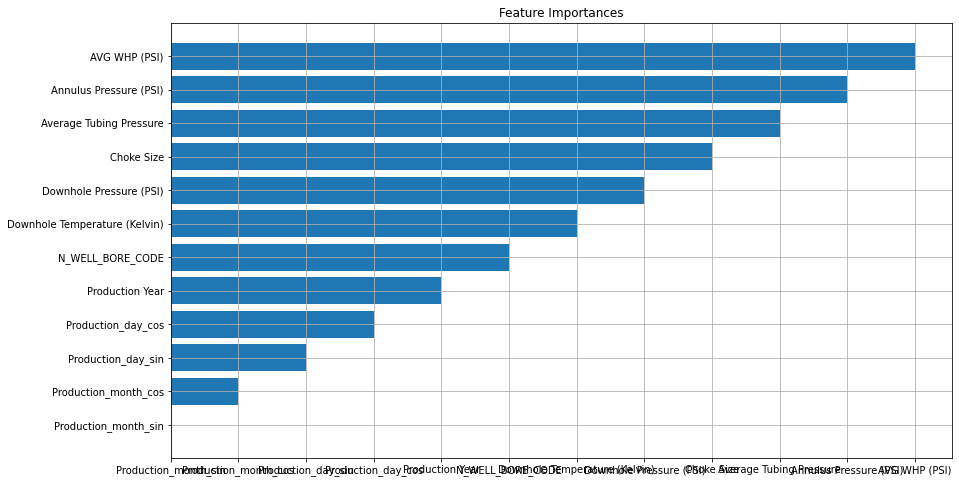

In [222]:
plot_feature_importances(ideal_model_et, X_train.columns)

From the plot above we can see that AVG WHP i.e Well Head Pressure contributes the most to the oil, gas and production rates and this aligns with my geological knowledge based on the features of this dataset

## Pathways to Better Performance

1. **Expanding the Data Pool**: Acquiring additional data can enhance the robustness of our model, providing it with more information to learn from and improve its predictive accuracy.

2. **Reducing Zero Values**: Minimizing the presence of zero values in the dataset can help reduce noise and improve the quality of the data, leading to more accurate and reliable predictions.

3. **Leveraging Deep Learning:**
Harnessing the power of deep learning will help to uncover more complex relationships within the data, generalize better, and ultimately achieve superior results.

# CLOSING REMARKS

Embarking on the journey of forecasting oil, gas, and water production rates using machine learning has been an exciting and enlightening experience. From the initial stages of data cleaning and exploratory analysis to the intricate process of model tuning and evaluation, each step has been filled with learning and discovery. 

I delved into the depths of our dataset, uncovering hidden patterns and correlations, and leveraged the power of advanced algorithms to make accurate predictions. The optimized `ExtraTreesRegressor` emerged as a standout performer, showcasing the remarkable potential of machine learning in this domain.

As I navigated through this project, we encountered challenges that pushed me to think critically and creatively, ultimately enhancing my understanding of both the data and the tools at our disposal. The journey wasn't just about achieving lower RMSE and MAE scores or higher R-squared values; it was about the thrill of exploration, the satisfaction of problem-solving, and the joy of discovery.

Thank you for accompanying me on this remarkable adventure. Together, we have witnessed the transformative power of machine learning in the energy sector, and I hope this project has been as inspiring and insightful for you as it has been for me. The future of data-driven forecasting in oil, gas, and water production looks incredibly promising, and I am excited to see where this journey will lead next.🚀✨